1. Impact of M&A deal to profitability, effciency, liquidity, finantial structure and investment ratios of firms

Step 1: Import Libraries and Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns


In [ ]:

# Load the Dataset
file_path = '/content/project data.xlsx'
data = pd.read_excel(file_path)
data


year Financial Year           Start Date             End Date  \
0      -3      2014/2015  2014-01-04 00:00:00           03/31/2015   
1      -2      2014/2015  2014-01-04 00:00:00           03/31/2015   
2      -1      2014/2015  2014-01-04 00:00:00           03/31/2015   
3       0      2014/2015  2014-01-04 00:00:00           03/31/2015   
4       1      2014/2015  2014-01-04 00:00:00           03/31/2015   
..    ...            ...                  ...                  ...   
219    -1      2012/2013           31/08/2012  2013-12-31 00:00:00   
220     0      2012/2013           31/08/2012  2013-12-31 00:00:00   
221     1      2012/2013           31/08/2012  2013-12-31 00:00:00   
222     2      2012/2013           31/08/2012  2013-12-31 00:00:00   
223     3      2012/2013           31/08/2012  2013-12-31 00:00:00   

              Acquirer Name    Sales  Gross Profit  Net Profit  Fixed Assets  \
0            ACL Cables PLC    983.0           0.0       -31.0          76.0   
1            ACL Cables PLC    956.0           0.0      -371.0          95.0   
2            ACL Cables PLC   1803.0           0.0      -379.0          94.0   
3            ACL Cables PLC   1328.0           0.0       222.0         328.0   
4            ACL Cables PLC   2123.0           0.0      1151.0         681.0   
..                      ...      ...           ...         ...           ...   
219  Expolanka Holdings PLC  21327.0           0.0      5415.0       30441.0   
220  Expolanka Holdings PLC  34628.0           0.0      9542.0       59290.0   
221  Expolanka Holdings PLC  66079.0           0.0      2629.0       95532.0   
222  Expolanka Holdings PLC  76162.0           0.0      9655.0      132469.0   
223  Expolanka Holdings PLC  76617.0           0.0      7966.0      138985.0   

     Total Assets  Current Assets  Inventory  Cash & Cash Equivalents  \
0          3061.0          2050.0        0.0                      0.0   
1          4474.0          3857.0        0.0                      0.0   
2          4350.0          3255.0        0.0                      0.0   
3          5753.0          3549.0        0.0                      0.0   
4          3156.0          2457.0        0.0                      0.0   
..            ...             ...        ...                      ...   
219       40008.0          9567.0        NaN                      NaN   
220       79487.0         20197.0        NaN                      NaN   
221      118531.0         22999.0        NaN                      NaN   
222      159019.0         26550.0        NaN                      NaN   
223      174603.0         35618.0        NaN                      NaN   

      Equity  Current Liabilities  Total Debt  Toal Liabilities  Closing Price  
0     1277.0               1693.0         NaN            1784.0            NaN  
1      621.0               3760.0         NaN            3853.0            NaN  
2      243.0               3920.0         NaN            4106.0            NaN  
3      519.0               4485.0         NaN            5234.0            NaN  
4     1763.0               1530.0         NaN            1702.0            NaN  
..       ...                  ...         ...               ...            ...  
219  20322.0               3321.0      4989.0           19686.0          547.0  
220  23953.0               4740.0     23340.0           55534.0          635.0  
221  31742.0              11228.0     37664.0           86789.0          465.0  
222  46552.0              10769.0     52234.0          112467.0          440.0  
223  44192.0              16765.0     61292.0          130411.0          365.0  

[224 rows x 18 columns]

In [ ]:
data.head(10)

year Financial Year           Start Date    End Date  \
0    -3      2014/2015  2014-01-04 00:00:00  03/31/2015   
1    -2      2014/2015  2014-01-04 00:00:00  03/31/2015   
2    -1      2014/2015  2014-01-04 00:00:00  03/31/2015   
3     0      2014/2015  2014-01-04 00:00:00  03/31/2015   
4     1      2014/2015  2014-01-04 00:00:00  03/31/2015   
5     2      2014/2015  2014-01-04 00:00:00  03/31/2015   
6     3      2014/2015  2014-01-04 00:00:00  03/31/2015   
7    -3      2009/2010  2009-01-04 00:00:00  03/31/2010   
8    -2      2009/2010  2009-01-04 00:00:00  03/31/2010   
9    -1      2009/2010  2009-01-04 00:00:00  03/31/2010   

                      Acquirer Name    Sales  Gross Profit  Net Profit  \
0                    ACL Cables PLC    983.0           0.0       -31.0   
1                    ACL Cables PLC    956.0           0.0      -371.0   
2                    ACL Cables PLC   1803.0           0.0      -379.0   
3                    ACL Cables PLC   1328.0           0.0       222.0   
4                    ACL Cables PLC   2123.0           0.0      1151.0   
5                    ACL Cables PLC   1996.0           0.0       697.0   
6                    ACL Cables PLC    855.0           0.0      -728.0   
7  Aitken Spence Hotel Holdings PLC  19766.0           0.0      2284.0   
8  Aitken Spence Hotel Holdings PLC  27516.0           0.0      2830.0   
9  Aitken Spence Hotel Holdings PLC  29308.0           0.0      3068.0   

   Fixed Assets  Total Assets  Current Assets  Inventory  \
0          76.0        3061.0          2050.0        0.0   
1          95.0        4474.0          3857.0        0.0   
2          94.0        4350.0          3255.0        0.0   
3         328.0        5753.0          3549.0        0.0   
4         681.0        3156.0          2457.0        0.0   
5         681.0        4939.0          2985.0        0.0   
6         839.0        5575.0          3381.0        0.0   
7       16770.0       26351.0          8524.0        0.0   
8       16982.0       31185.0         11465.0        0.0   
9       22636.0       36381.0         10721.0        0.0   

   ash & Cash Equivalents   Equity  Current Liabilities  Total Debt  \
0                     0.0   1277.0               1693.0         NaN   
1                     0.0    621.0               3760.0         NaN   
2                     0.0    243.0               3920.0         NaN   
3                     0.0    519.0               4485.0         NaN   
4                     0.0   1763.0               1530.0         NaN   
5                     0.0   1077.0               3419.0         NaN   
6                     0.0    916.0               3013.0         NaN   
7                     0.0  13125.0               6394.0         NaN   
8                     0.0  15787.0               8495.0         NaN   
9                     0.0  28831.0               8072.0         NaN   

   Toal Liabilities  Closing Price  
0            1784.0            NaN  
1            3853.0            NaN  
2            4106.0            NaN  
3            5234.0            NaN  
4            1702.0            NaN  
5            3862.0            NaN  
6            4859.0            NaN  
7           13225.0          380.0  
8           15398.0          430.0  
9           14749.0          315.0

In [ ]:
# View the dataset structure
data.head()



year Financial Year           Start Date    End Date   Acquirer Name  \
0    -3      2014/2015  2014-01-04 00:00:00  03/31/2015  ACL Cables PLC   
1    -2      2014/2015  2014-01-04 00:00:00  03/31/2015  ACL Cables PLC   
2    -1      2014/2015  2014-01-04 00:00:00  03/31/2015  ACL Cables PLC   
3     0      2014/2015  2014-01-04 00:00:00  03/31/2015  ACL Cables PLC   
4     1      2014/2015  2014-01-04 00:00:00  03/31/2015  ACL Cables PLC   

    Sales  Gross Profit  Net Profit  Fixed Assets  Total Assets  \
0   983.0           0.0       -31.0          76.0        3061.0   
1   956.0           0.0      -371.0          95.0        4474.0   
2  1803.0           0.0      -379.0          94.0        4350.0   
3  1328.0           0.0       222.0         328.0        5753.0   
4  2123.0           0.0      1151.0         681.0        3156.0   

   Current Assets  Inventory  ash & Cash Equivalents  Equity  \
0          2050.0        0.0                     0.0  1277.0   
1          3857.0        0.0                     0.0   621.0   
2          3255.0        0.0                     0.0   243.0   
3          3549.0        0.0                     0.0   519.0   
4          2457.0        0.0                     0.0  1763.0   

   Current Liabilities  Total Debt  Toal Liabilities  Closing Price  
0               1693.0         NaN            1784.0            NaN  
1               3760.0         NaN            3853.0            NaN  
2               3920.0         NaN            4106.0            NaN  
3               4485.0         NaN            5234.0            NaN  
4               1530.0         NaN            1702.0            NaN

In [ ]:
#mean values and other relevant statistics:

data.describe()

year          Sales   Gross Profit    Net Profit   Fixed Assets  \
count  224.000000     223.000000     223.000000  2.230000e+02     216.000000   
mean     0.000000   25821.831839    6030.685202  1.088916e+04   18380.829630   
std      2.004479   38502.017290   33306.976850  7.818360e+04   27458.459135   
min     -3.000000       0.000000       0.000000 -1.220800e+04       0.000000   
25%     -2.000000    2843.500000       0.000000  2.640000e+02    1665.350000   
50%      0.000000   15243.000000       0.000000  1.094000e+03    8503.500000   
75%      2.000000   33772.500000     331.000000  3.467000e+03   23473.500000   
max      3.000000  313557.000000  268538.000000  1.103662e+06  138985.000000   

        Total Assets  Current Assets  Inventory  Cash & Cash Equivalents  \
count     223.000000      202.000000      147.0               161.000000   
mean    33783.450673    10706.347525        0.0               482.663975   
std     38415.541104    12737.396466        0.0              1906.294414   
min         0.000000        0.000000        0.0                 0.000000   
25%      5403.000000     1704.000000        0.0                 0.000000   
50%     18994.000000     5838.000000        0.0                 0.000000   
75%     45577.500000    14749.250000        0.0                 0.000000   
max    174603.000000    72267.900000        0.0             14101.500000   

             Equity  Current Liabilities    Total Debt  Toal Liabilities  \
count    223.000000           139.000000    113.000000        216.000000   
mean   13590.931390          5688.064748  11254.911504      16036.168519   
std    15770.254135          5288.617116  14656.762461      26810.685316   
min        0.000000             0.000000      0.000000     -34039.000000   
25%     1837.000000          1705.000000   1630.000000       2762.500000   
50%     7039.000000          3760.000000   4989.000000       7508.000000   
75%    21378.000000          8352.000000  15363.000000      17979.750000   
max    79962.000000         24093.000000  61292.000000     130411.000000   

       Closing Price  
count     127.000000  
mean      252.966535  
std       598.387328  
min         0.000000  
25%        22.125000  
50%        80.000000  
75%       292.150000  
max      3800.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    224 non-null    int64  
 1   Financial Year          224 non-null    object 
 2   Start Date              196 non-null    object 
 3   End Date                175 non-null    object 
 4   Acquirer Name           224 non-null    object 
 5   Sales                   223 non-null    float64
 6   Gross Profit            223 non-null    float64
 7   Net Profit              223 non-null    float64
 8   Fixed Assets            216 non-null    float64
 9   Total Assets            223 non-null    float64
 10  Current Assets          202 non-null    float64
 11  Inventory               147 non-null    float64
 12  ash & Cash Equivalents  161 non-null    float64
 13  Equity                  223 non-null    float64
 14  Current Liabilities     139 non-null    fl

In [ ]:
# Ensure the "year" column is correctly labeled for pre-M&A (-3, -2, -1) and post-M&A (1, 2, 3).
# Check for missing values
print(data.isnull().sum())

year                         0
Financial Year               0
Start Date                  28
End Date                    49
Acquirer Name                0
Sales                        1
Gross Profit                 1
Net Profit                   1
Fixed Assets                 8
Total Assets                 1
Current Assets              22
Inventory                   77
Cash & Cash Equivalents     63
Equity                       1
Current Liabilities         85
Total Debt                 111
Toal Liabilities             8
Closing Price               97
dtype: int64


Basic Information About the Dataset

In [ ]:
# Check the shape of the dataset (rows and columns)
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")



Dataset contains 224 rows and 18 columns.


In [ ]:
# Check the column names
print("Column Names:")
print(data.columns)


Column Names:
Index(['year', 'Financial Year', 'Start Date', 'End Date', 'Acquirer Name',
       'Sales', 'Gross Profit', 'Net Profit', 'Fixed Assets', 'Total Assets',
       'Current Assets', 'Inventory', 'ash & Cash Equivalents', 'Equity',
       'Current Liabilities', 'Total Debt', 'Toal Liabilities',
       'Closing Price'],
      dtype='object')


In [ ]:

# Check the data types of each column
print("\nData Types:")
print(data.dtypes)



Data Types:
year                        int64
Financial Year             object
Start Date                 object
End Date                   object
Acquirer Name              object
Sales                     float64
Gross Profit              float64
Net Profit                float64
Fixed Assets              float64
Total Assets              float64
Current Assets            float64
Inventory                 float64
ash & Cash Equivalents    float64
Equity                    float64
Current Liabilities       float64
Total Debt                float64
Toal Liabilities          float64
Closing Price             float64
dtype: object


In [ ]:

# Summary statistics for numerical columns
print("\nSummary Statistics:")
data.describe()



Summary Statistics:


year          Sales   Gross Profit    Net Profit   Fixed Assets  \
count  224.000000     223.000000     223.000000  2.230000e+02     216.000000   
mean     0.000000   25821.831839    6030.685202  1.088916e+04   18380.829630   
std      2.004479   38502.017290   33306.976850  7.818360e+04   27458.459135   
min     -3.000000       0.000000       0.000000 -1.220800e+04       0.000000   
25%     -2.000000    2843.500000       0.000000  2.640000e+02    1665.350000   
50%      0.000000   15243.000000       0.000000  1.094000e+03    8503.500000   
75%      2.000000   33772.500000     331.000000  3.467000e+03   23473.500000   
max      3.000000  313557.000000  268538.000000  1.103662e+06  138985.000000   

        Total Assets  Current Assets  Inventory  Cash & Cash Equivalents  \
count     223.000000      202.000000      147.0               161.000000   
mean    33783.450673    10706.347525        0.0               482.663975   
std     38415.541104    12737.396466        0.0              1906.294414   
min         0.000000        0.000000        0.0                 0.000000   
25%      5403.000000     1704.000000        0.0                 0.000000   
50%     18994.000000     5838.000000        0.0                 0.000000   
75%     45577.500000    14749.250000        0.0                 0.000000   
max    174603.000000    72267.900000        0.0             14101.500000   

             Equity  Current Liabilities    Total Debt  Toal Liabilities  \
count    223.000000           139.000000    113.000000        216.000000   
mean   13590.931390          5688.064748  11254.911504      16036.168519   
std    15770.254135          5288.617116  14656.762461      26810.685316   
min        0.000000             0.000000      0.000000     -34039.000000   
25%     1837.000000          1705.000000   1630.000000       2762.500000   
50%     7039.000000          3760.000000   4989.000000       7508.000000   
75%    21378.000000          8352.000000  15363.000000      17979.750000   
max    79962.000000         24093.000000  61292.000000     130411.000000   

       Closing Price  
count     127.000000  
mean      252.966535  
std       598.387328  
min         0.000000  
25%        22.125000  
50%        80.000000  
75%       292.150000  
max      3800.000000

In [ ]:
correlations = data.corr()


ValueError: could not convert string to float: '2014/2015'


Correlation Heatmap:


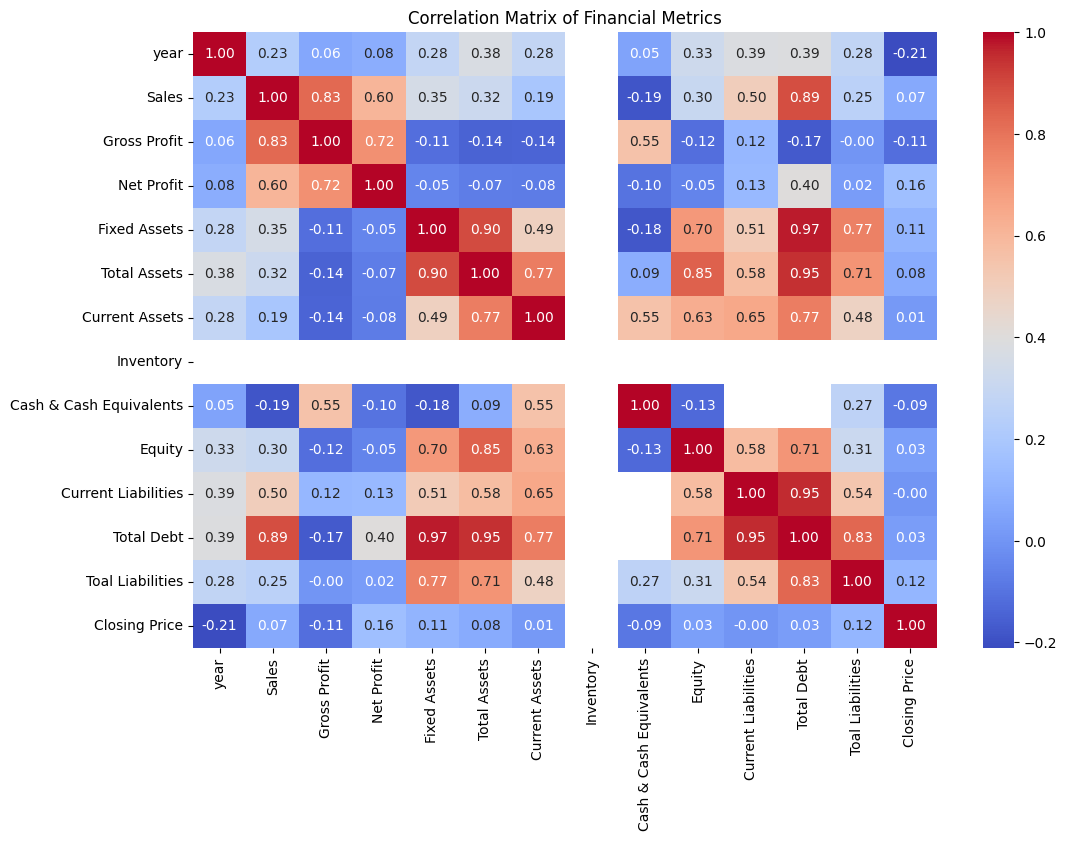

In [ ]:
# Plot correlations
print("\nCorrelation Heatmap:")

# Select numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=np.number).columns

# Compute the correlation matrix using only numerical columns
correlation_matrix = data[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()

Check for Missing Values


Missing Values:
year                         0
Financial Year               0
Start Date                  28
End Date                    49
Acquirer Name                0
Sales                        1
Gross Profit                 1
Net Profit                   1
Fixed Assets                 8
Total Assets                 1
Current Assets              22
Inventory                   77
Cash & Cash Equivalents     63
Equity                       1
Current Liabilities         85
Total Debt                 111
Toal Liabilities             8
Closing Price               97
dtype: int64


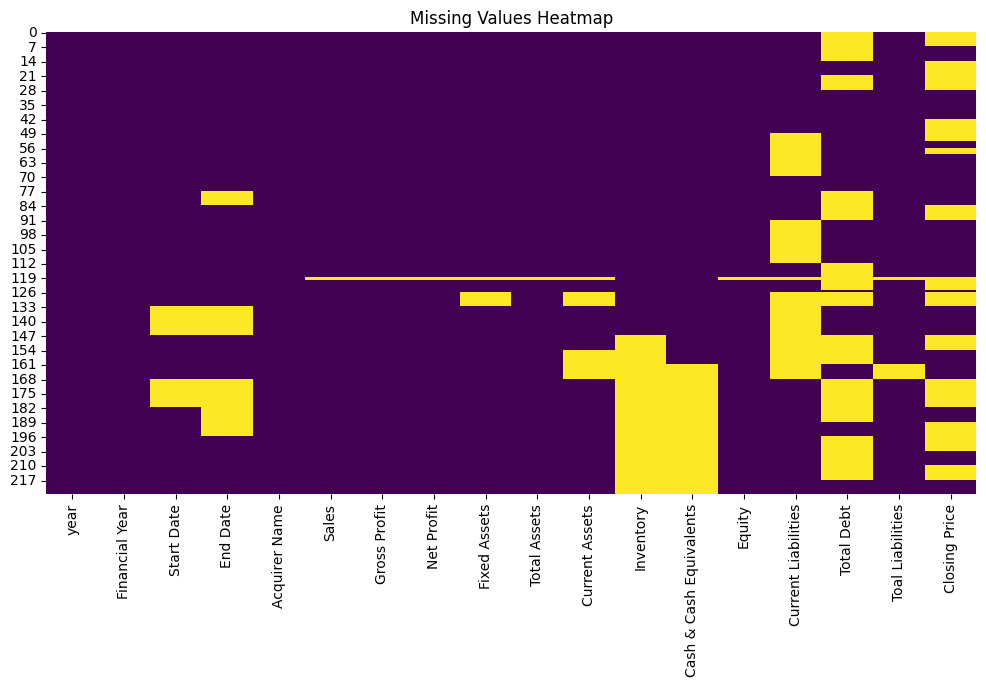

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


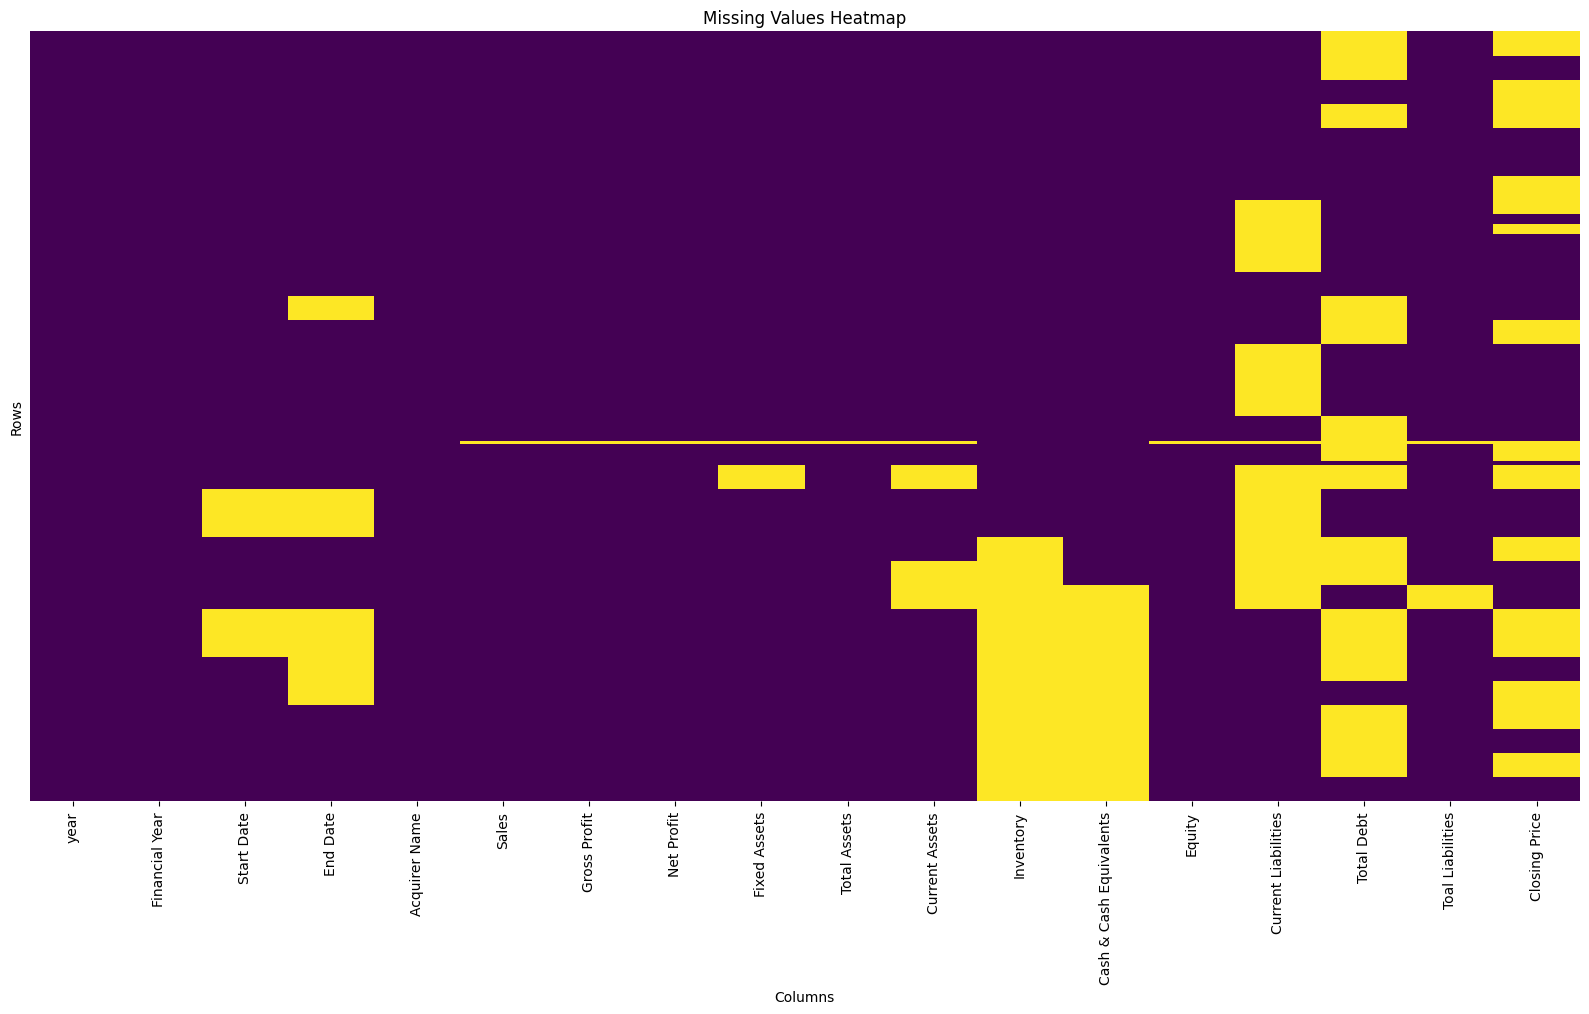

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Function to create a heatmap of missing values
def plot_missing_values_heatmap(data):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

# Function to assess missing values severity
def assess_missing_severity(data):
    # Missing values by column
    missing_by_column = data.isnull().sum().sort_values(ascending=False)
    missing_column_severity = pd.DataFrame({
        "Column": missing_by_column.index,
        "Missing Count": missing_by_column.values,
        "Percentage Missing": (missing_by_column.values / len(data)) * 100
    })

    # Missing values by row
    missing_by_row = data.isnull().sum(axis=1).sort_values(ascending=False)
    missing_row_severity = pd.DataFrame({
        "Row Index": missing_by_row.index,
        "Missing Count": missing_by_row.values,
        "Percentage Missing": (missing_by_row.values / len(data.columns)) * 100
    })

    return missing_column_severity, missing_row_severity

# Identify clusters of missingness
def identify_missing_patterns(data):
    # Identify columns with high missing values
    high_missing_columns = data.columns[data.isnull().mean() > 0.5]  # More than 50% missing
    low_missing_columns = data.columns[data.isnull().mean() <= 0.5]

    # Identify rows with high missing values
    high_missing_rows = data[data.isnull().mean(axis=1) > 0.5]  # More than 50% missing
    low_missing_rows = data[data.isnull().mean(axis=1) <= 0.5]

    return high_missing_columns, low_missing_columns, high_missing_rows, low_missing_rows

# Plot the missing values heatmap
plot_missing_values_heatmap(data)

# Assess severity
missing_column_severity, missing_row_severity = assess_missing_severity(data)

# Identify clusters of missingness
high_missing_columns, low_missing_columns, high_missing_rows, low_missing_rows = identify_missing_patterns(data)


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load your dataset
df = data

# Drop Columns with >80% Missing Values
threshold = 0.8
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df_cleaned = df.drop(columns=columns_to_drop)

# Drop Rows with >80% Missing Values
rows_to_drop = df_cleaned[df_cleaned.isnull().mean(axis=1) > threshold].index
df_cleaned = df_cleaned.drop(index=rows_to_drop)

# 3. Impute Missing Data
# Mean/Median/Mode for Numerical Columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Mode for Categorical Columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


# Select only numerical features for KNN imputation
numerical_df = df_cleaned.select_dtypes(include=['number'])

imputer = KNNImputer(n_neighbors=5)
df_cleaned_imputed_numerical = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)

# Merge imputed numerical features back with categorical features
df_cleaned_imputed = pd.concat([df_cleaned_imputed_numerical, df_cleaned.select_dtypes(exclude=['number'])], axis=1)


# 4. Flag Missing Data
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[f"{col}_missing_flag"] = df[col].isnull().astype(int)

# Save the cleaned dataset without binary flag columns
df_cleaned.to_csv('/content/cleaned_dataset_no_flags.csv', index=False)
df_cleaned_imputed.to_csv('/content/cleaned_dataset_imputed_no_flags.csv', index=False)

# Notify the user
print("Cleaned datasets saved without binary flag columns:")
print("- Basic cleaned dataset: cleaned_dataset_no_flags.csv")
print("- KNN-imputed dataset: cleaned_dataset_imputed_no_flags.csv")


# Save the cleaned dataset
#df_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)
#df_cleaned_imputed.to_csv('/content/cleaned_dataset_imputed.csv', index=False)

# Output results
print("Columns dropped:", columns_to_drop)
print("Rows dropped:", len(rows_to_drop))
print("Cleaned dataset saved as cleaned_dataset.csv and cleaned_dataset_imputed.csv")

Cleaned datasets saved without binary flag columns:
- Basic cleaned dataset: cleaned_dataset_no_flags.csv
- KNN-imputed dataset: cleaned_dataset_imputed_no_flags.csv
Columns dropped: Index([], dtype='object')
Rows dropped: 0
Cleaned dataset saved as cleaned_dataset.csv and cleaned_dataset_imputed.csv


<ipython-input-6-059885732f88>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-6-059885732f88>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Load both cleaned datasets
cleaned_dataset = pd.read_csv('/content/cleaned_dataset_no_flags.csv')
cleaned_imputed_dataset = pd.read_csv('/content/cleaned_dataset_imputed_no_flags.csv')



Missing Values:
year                       0
Sales                      0
Gross Profit               0
Net Profit                 0
Fixed Assets               0
Total Assets               0
Current Assets             0
Inventory                  0
Cash & Cash Equivalents    0
Equity                     0
Current Liabilities        0
Total Debt                 0
Toal Liabilities           0
Closing Price              0
Financial Year             0
Start Date                 0
End Date                   0
Acquirer Name              0
dtype: int64


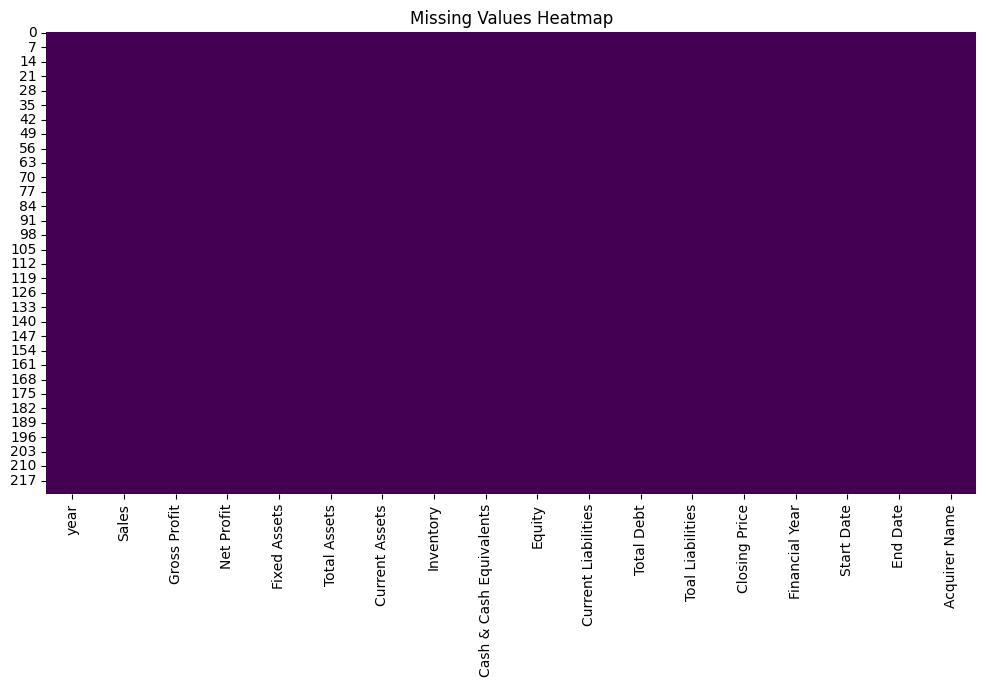

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(cleaned_imputed_dataset.isnull().sum())

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_imputed_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Missing Values:
year                                    0
Financial Year                          0
Start Date                              0
End Date                                0
Acquirer Name                           0
Sales                                   0
Gross Profit                            0
Net Profit                              0
Fixed Assets                            0
Total Assets                            0
Current Assets                          0
Inventory                               0
Cash & Cash Equivalents                 0
Equity                                  0
Current Liabilities                     0
Total Debt                              0
Toal Liabilities                        0
Closing Price                           0
Start Date_missing_flag                 0
End Date_missing_flag                   0
Sales_missing_flag                      0
Gross Profit_missing_flag               0
Net Profit_missing_flag                 0
Fixed Assets_miss

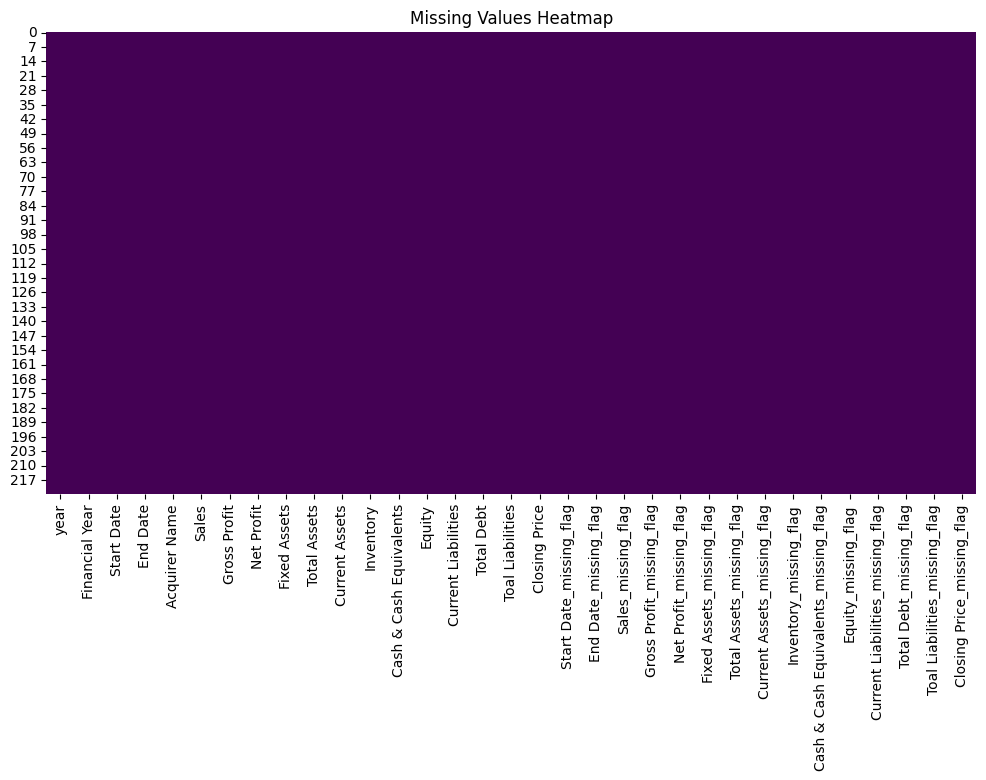

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(cleaned_dataset.isnull().sum())

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Plotting Distributions:


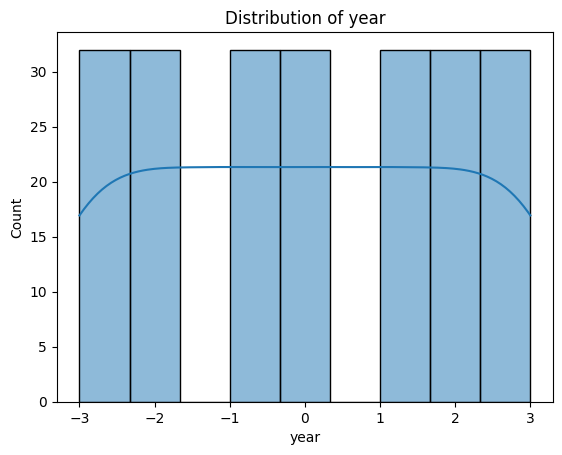

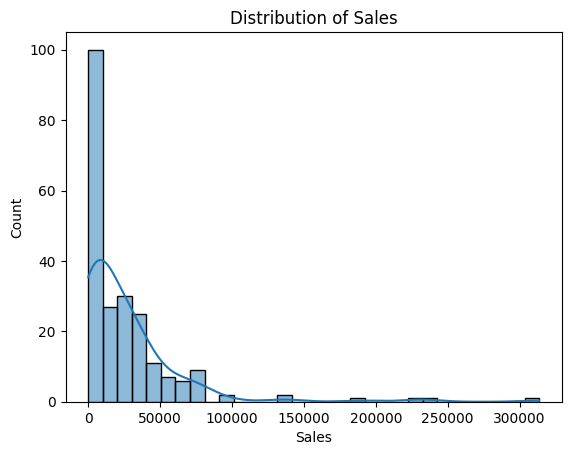

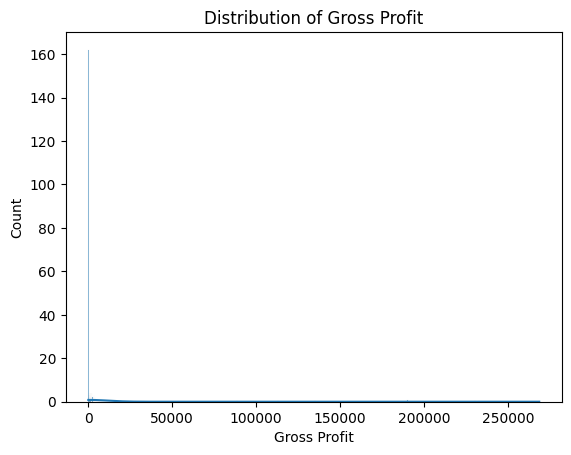

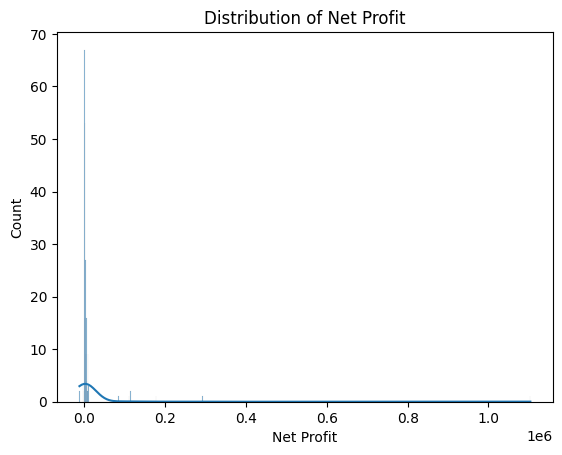

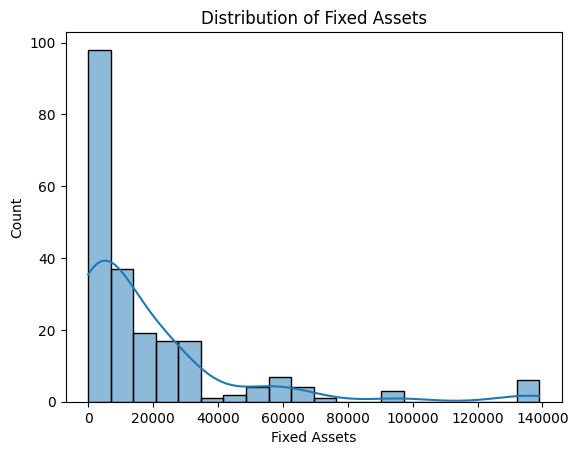

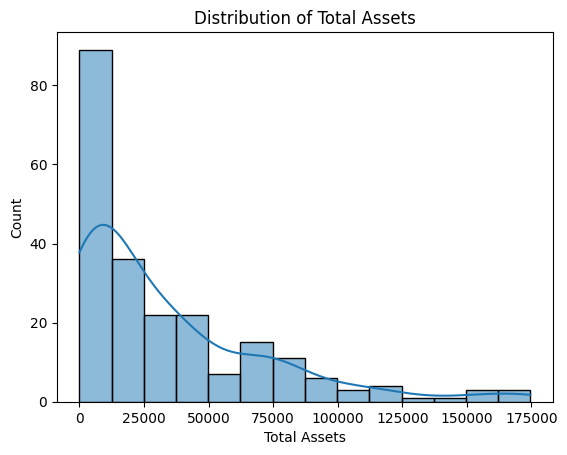

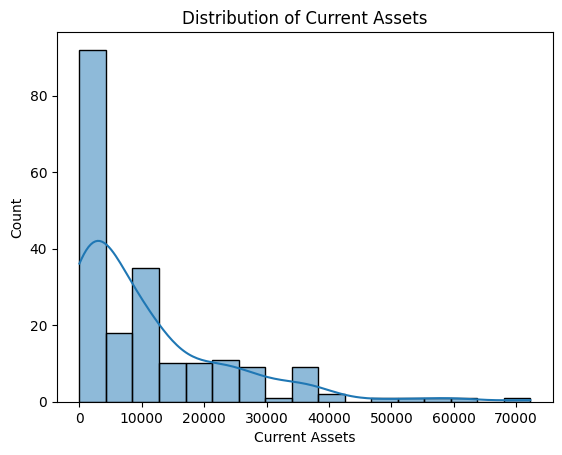

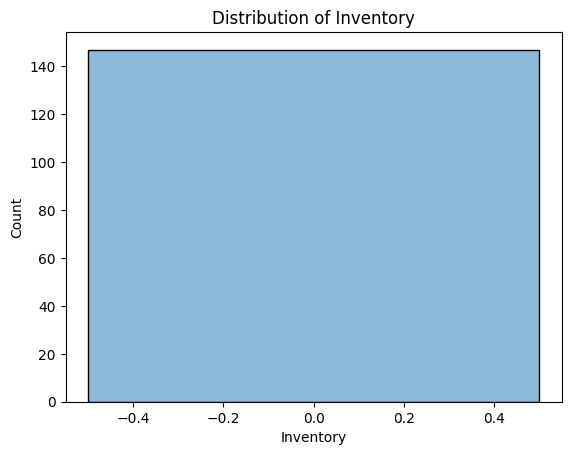

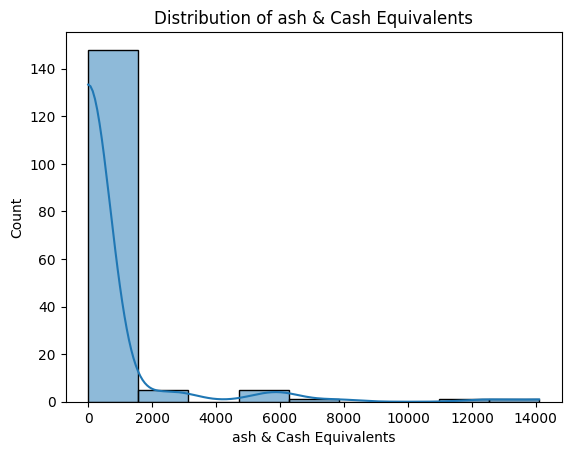

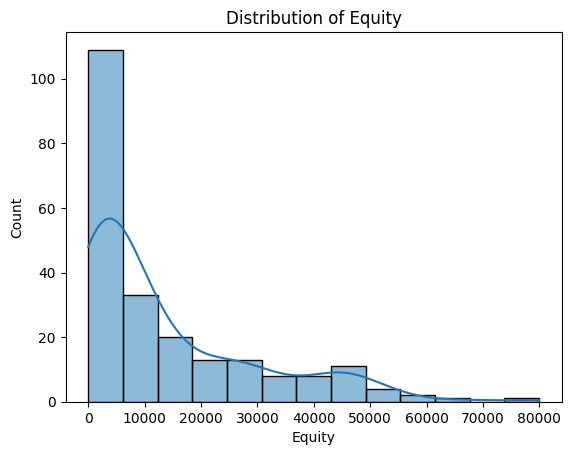

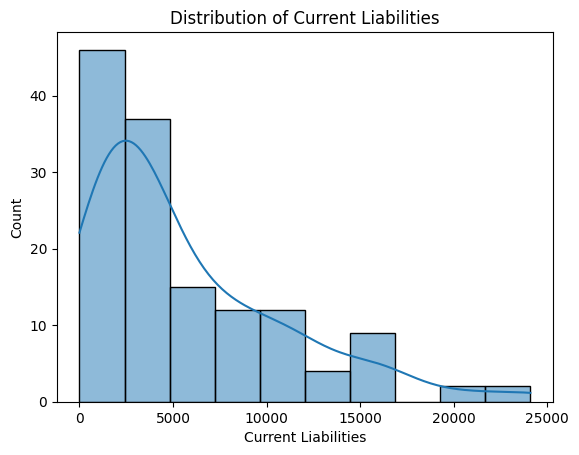

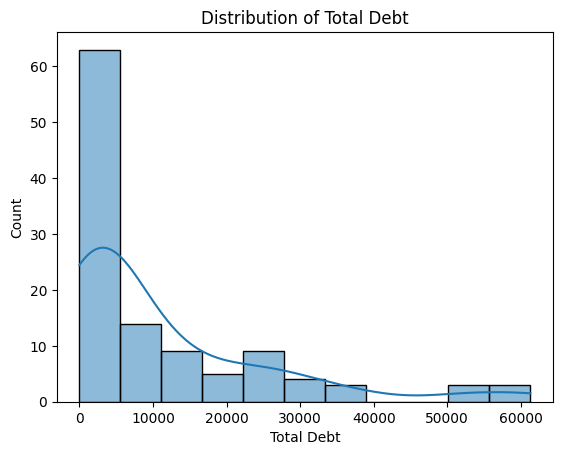

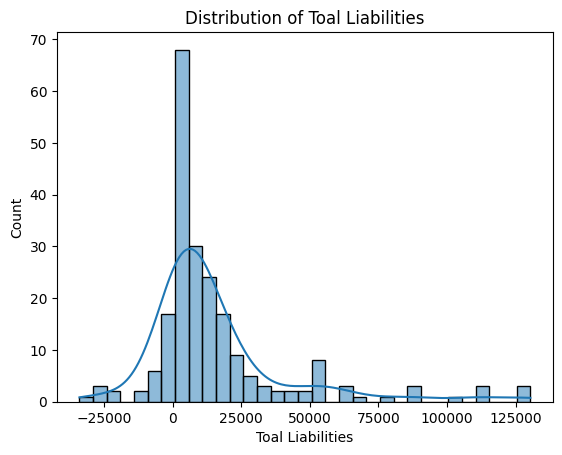

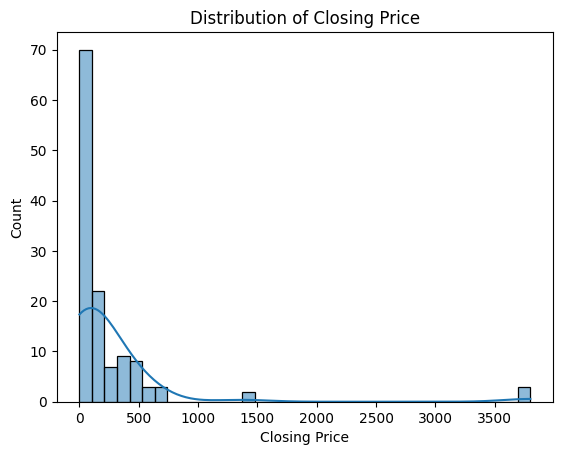

In [ ]:
# Plot distributions of numeric features
print("\nPlotting Distributions:")
for column in cleaned_dataset.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
# Plot correlations
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap:


ValueError: could not convert string to float: '2014/2015'

<Figure size 1000x800 with 0 Axes>


Correlation Heatmap:


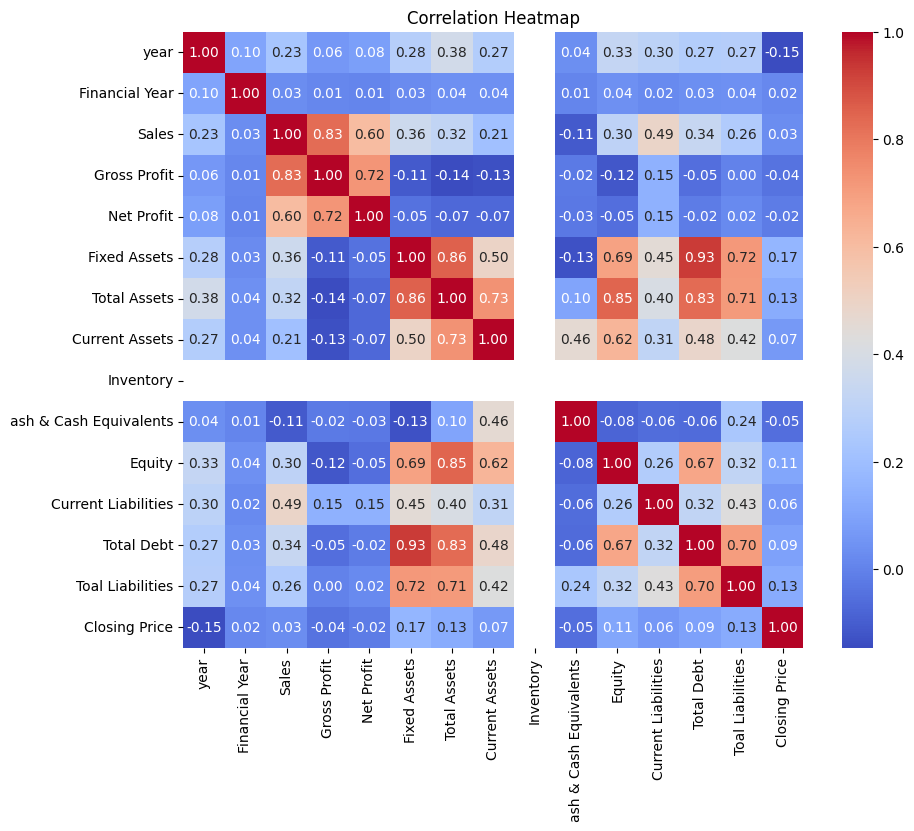

In [ ]:
# Plot correlations
print("\nCorrelation Heatmap:")

# Convert 'Financial Year' column to numeric if it's the issue
# Assuming the format is 'YYYY/YYYY', extract the first year
# Handle potential errors during conversion
def safe_convert_to_float(x):
    try:
        return float(x.split('/')[0])  # Split by '/' and convert the first element to float
    except (ValueError, AttributeError, IndexError):
        return np.nan  # Return NaN for invalid values

# Apply the safe conversion function to the 'Financial Year' column
cleaned_dataset['Financial Year'] = cleaned_dataset['Financial Year'].apply(safe_convert_to_float)

# Exclude datetime columns before calculating correlation
numeric_data = cleaned_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

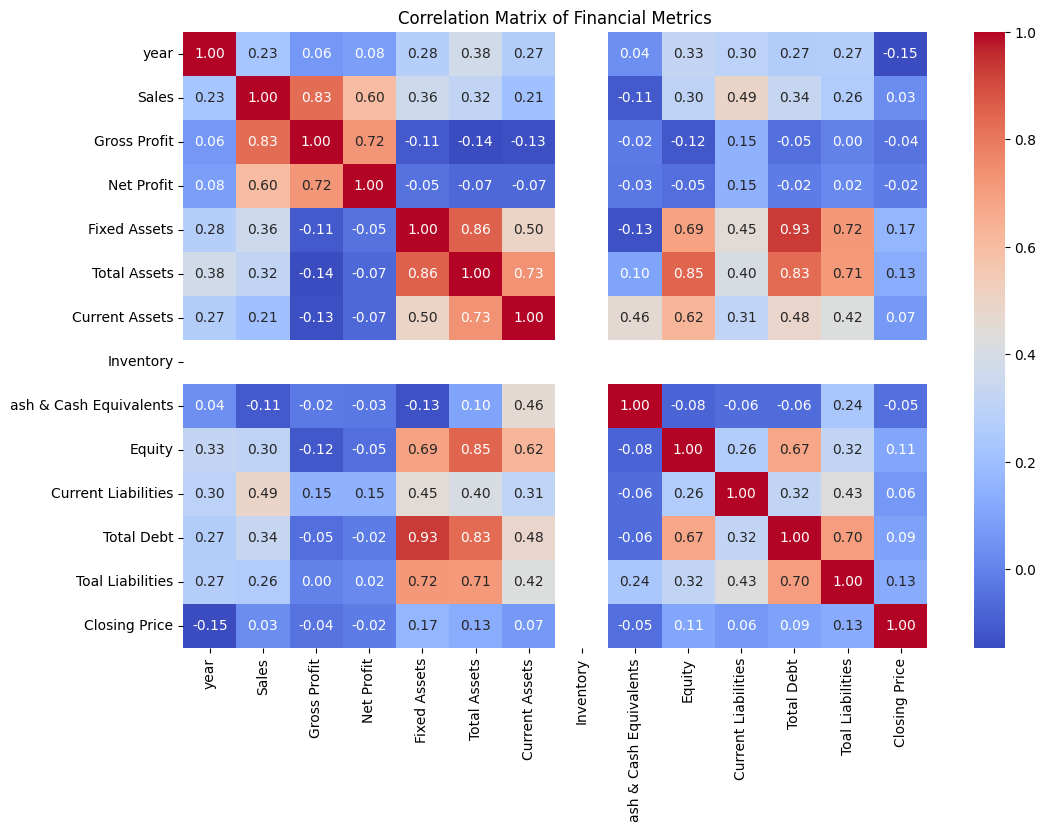

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = cleaned_dataset.select_dtypes(include=np.number).columns

# Compute the correlation matrix
correlation_matrix = cleaned_dataset[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()



Categorical Feature Analysis:


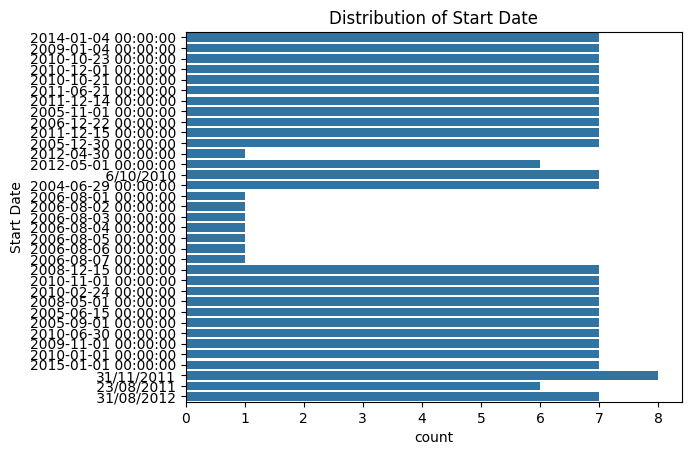

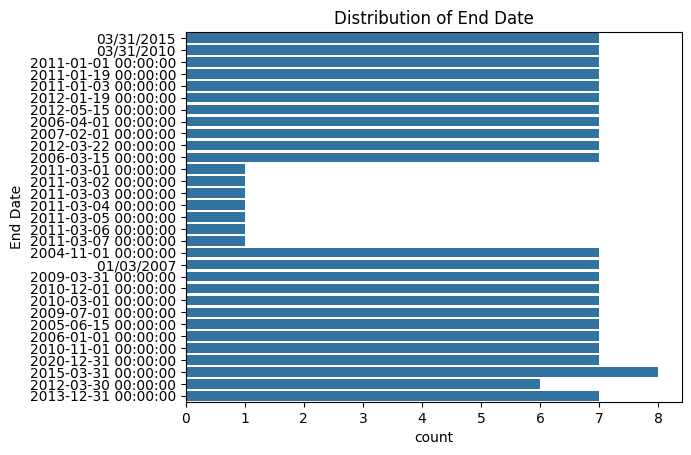

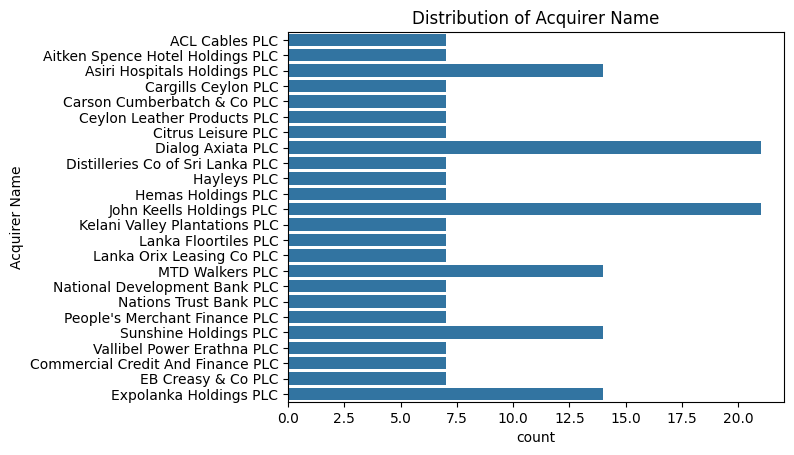

In [ ]:
# Categorical feature analysis
print("\nCategorical Feature Analysis:")
for column in cleaned_dataset.select_dtypes(include=['object']).columns:
    sns.countplot(y=data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

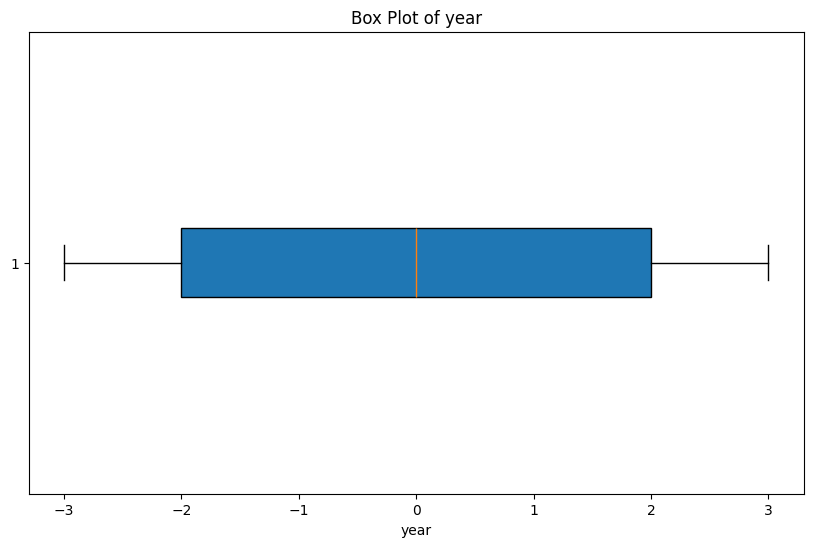

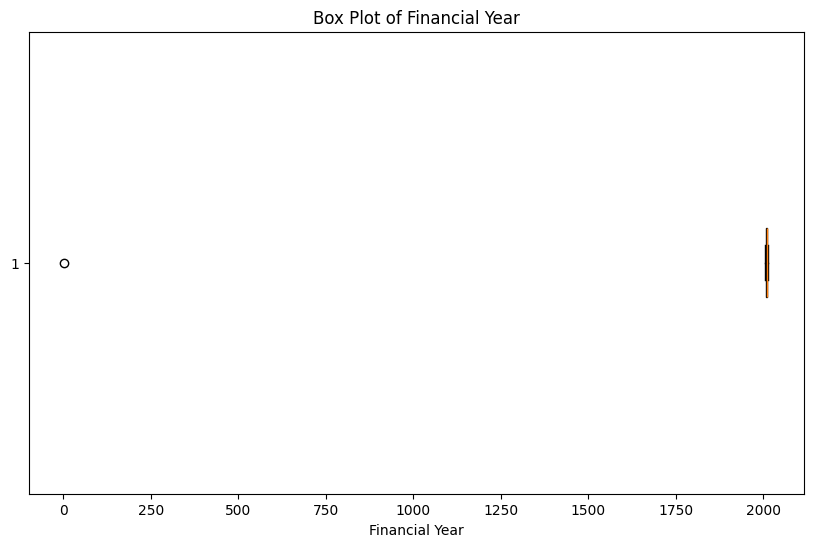

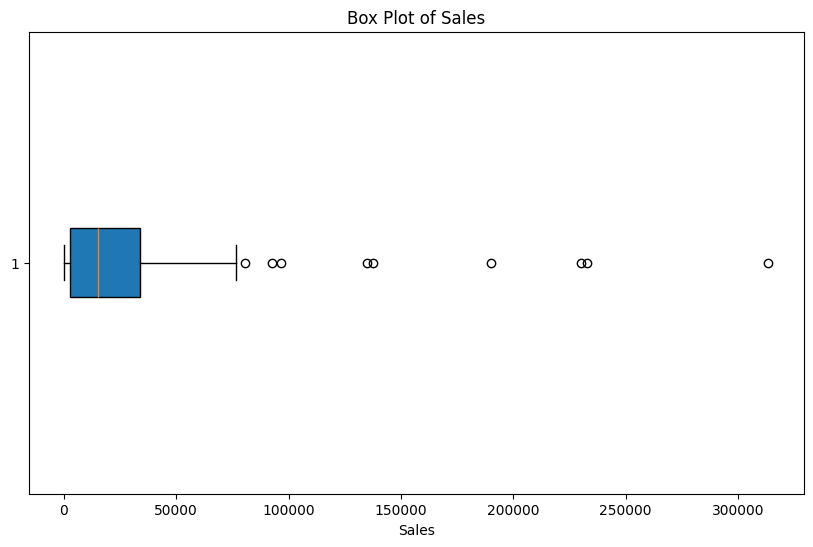

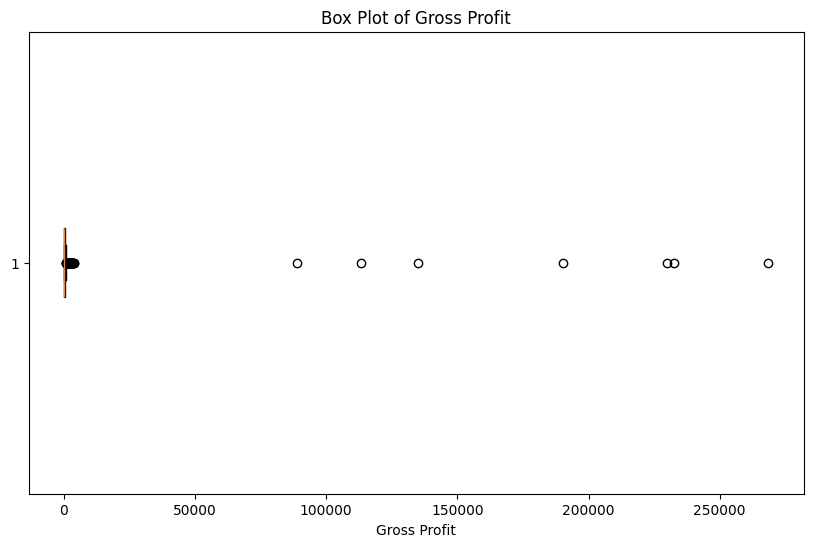

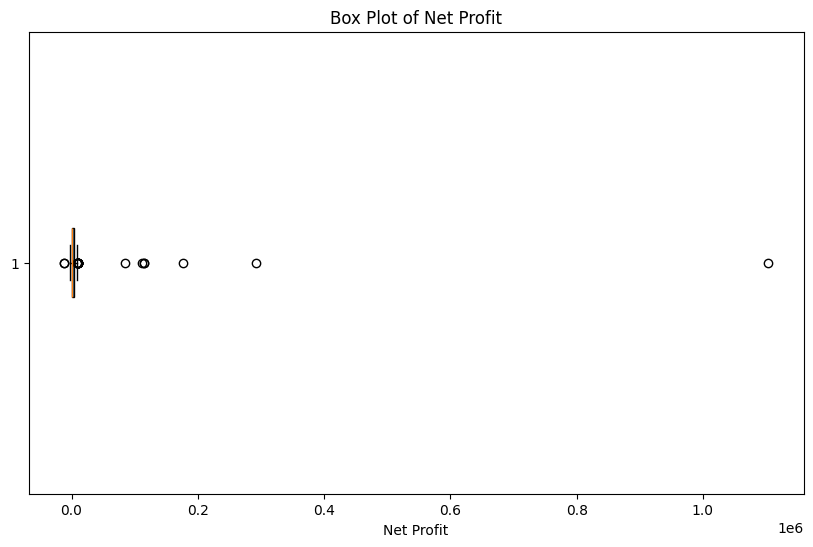

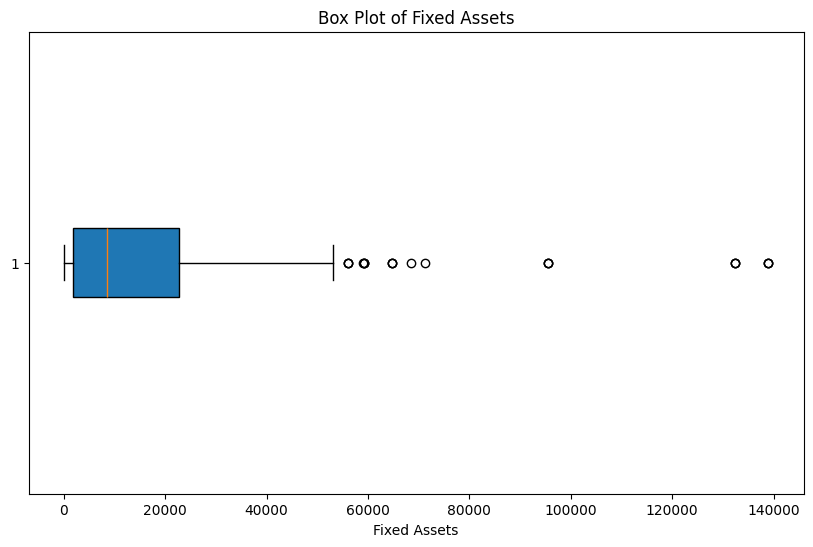

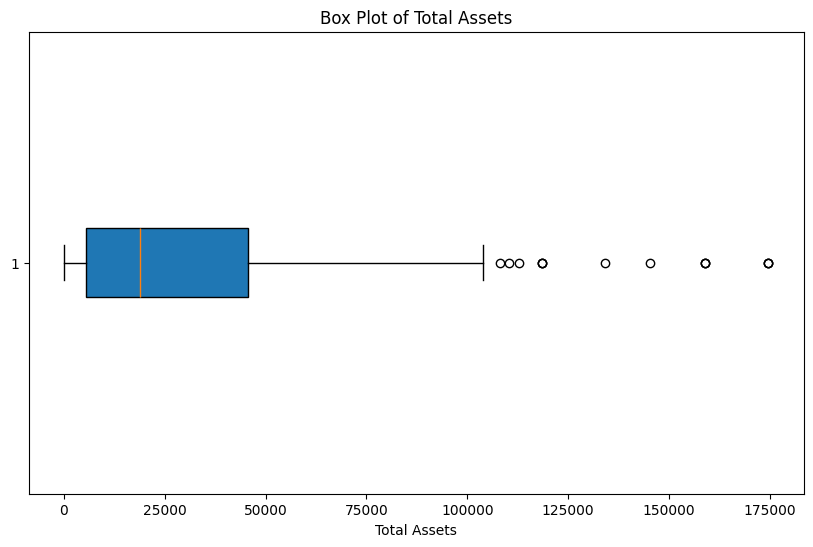

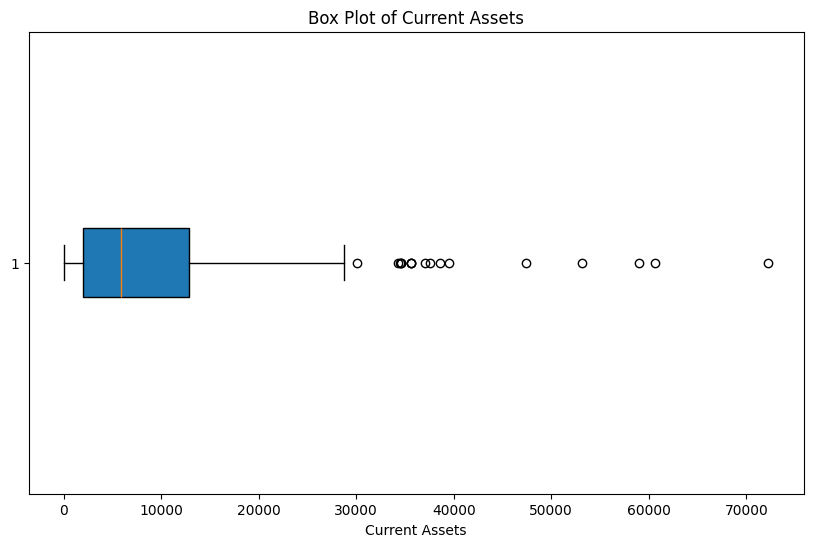

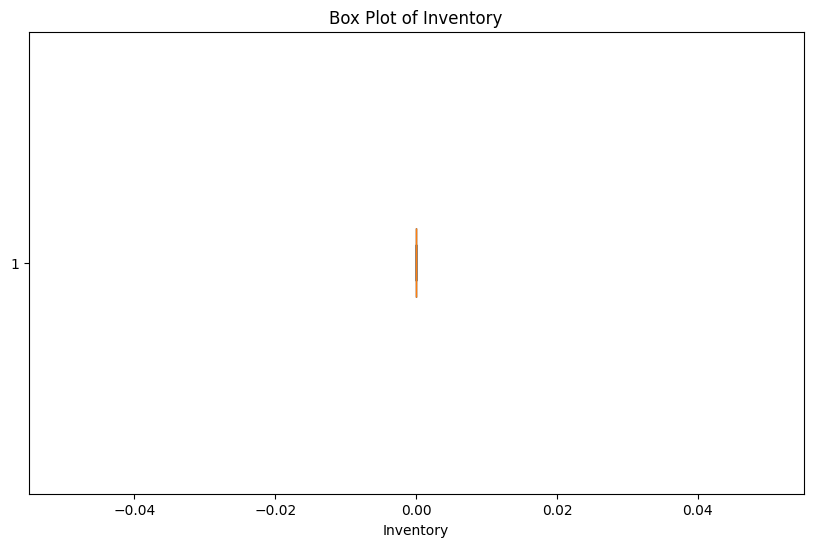

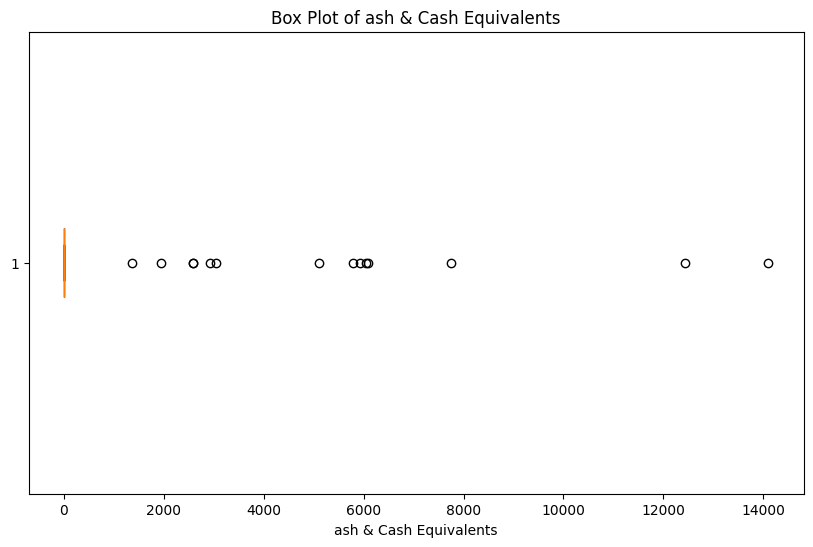

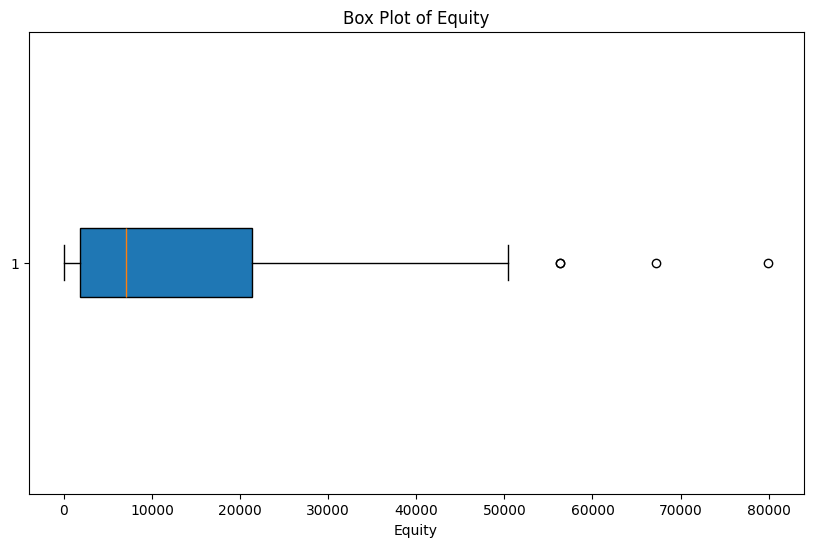

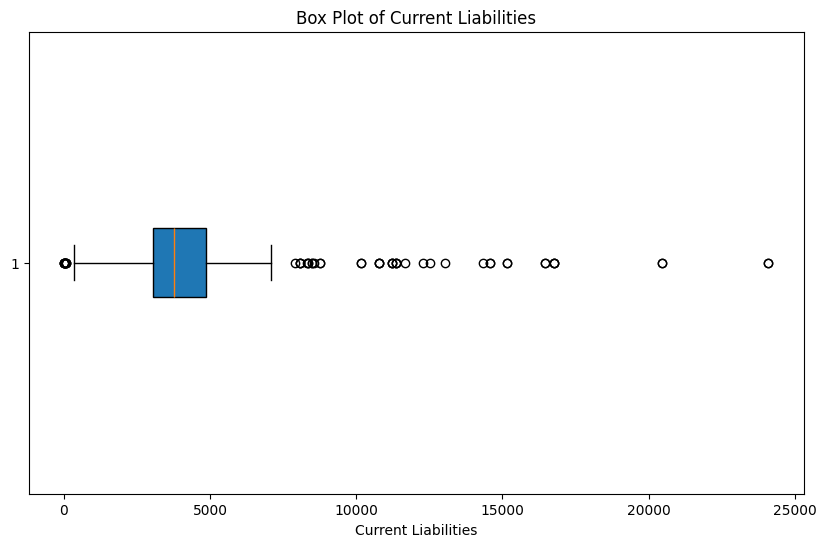

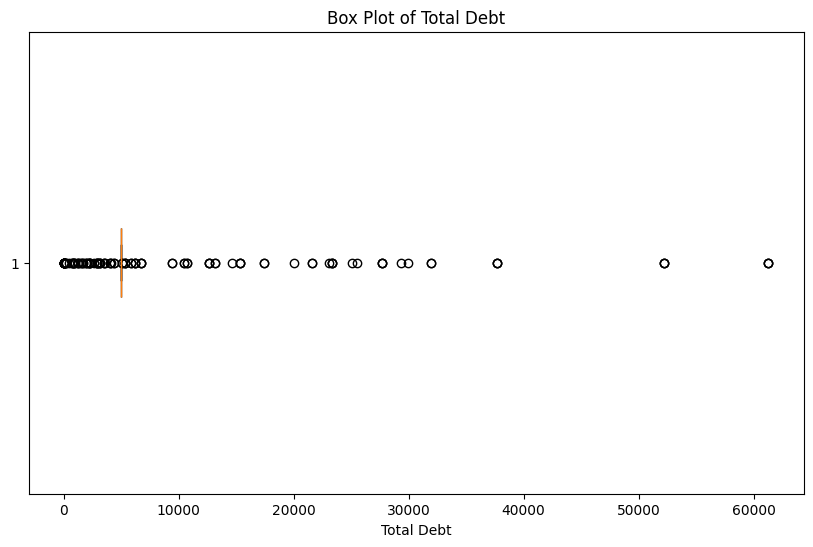

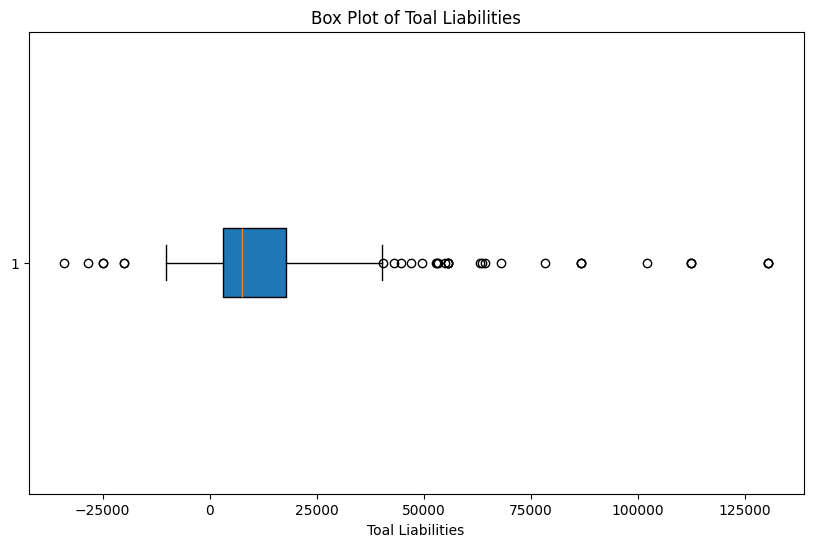

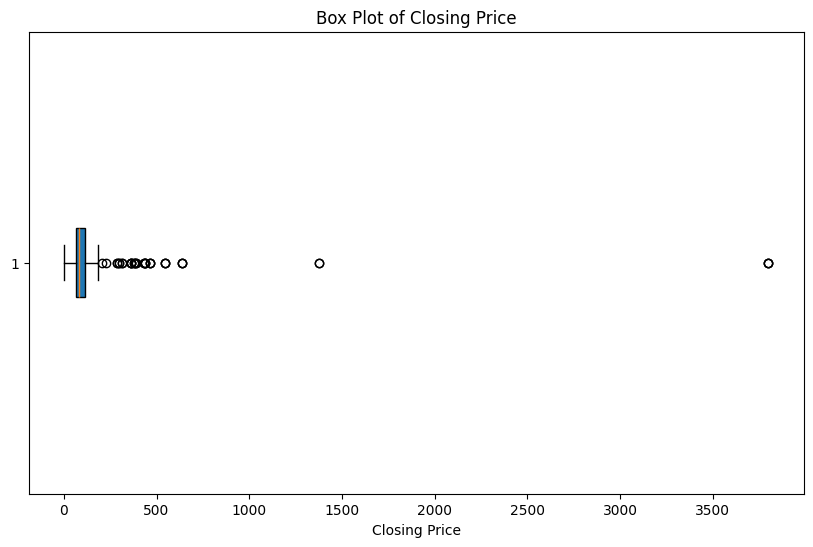

In [ ]:
# Select numeric columns
numeric_columns = cleaned_dataset.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(cleaned_dataset[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
import pandas as pd


# Function to calculate financial ratios
def calculate_financial_ratios(df):
    df['Net Profit Margin'] = df['Net Profit'] / df['Sales']  # Net Profit Margin
    df['Return on Assets'] = df['Net Profit'] / df['Total Assets']  # Return on Assets
    df['Return on Equity'] = df['Net Profit'] / df['Equity']  # Return on Equity
    df['Total Asset Turnover'] = df['Sales'] / df['Total Assets']  # Total Asset Turnover
    df['Fixed Asset Turnover'] = df['Sales'] / df['Fixed Assets']  # Fixed Asset Turnover
    df['Current Ratio'] = df['Current Assets'] / df['Current Liabilities']  # Current Ratio
    df['Debt to Equity Ratio'] = df['Total Debt'] / df['Equity']  # Debt to Equity Ratio
    df['Earnings Per Share'] = (df['Net Profit'] - 0) / df['Equity']  # Assuming no Preferred Dividends
    df['Book Value per Share'] = df['Equity'] / df['Equity']  # Adjust denominator if needed
    df['Price to Book Value'] = df['Closing Price'] / df['Book Value per Share']  # Price to Book Value
    df['Price Earnings Ratio'] = df['Closing Price'] / df['Earnings Per Share']  # Price Earnings Ratio
    return df

# Calculate financial ratios
ratios_cleaned = calculate_financial_ratios(cleaned_dataset.copy())
ratios_imputed = calculate_financial_ratios(cleaned_imputed_dataset.copy())

# Save the results
ratios_cleaned.to_csv('/content/financial_ratios_cleaned.csv', index=False)
ratios_imputed.to_csv('/content/financial_ratios_imputed.csv', index=False)

# display
print("Financial ratios calculated and saved:")
print("- Cleaned dataset without imputation: financial_ratios_cleaned.csv")
print("- Cleaned dataset with KNN imputation: financial_ratios_imputed.csv")


Financial ratios calculated and saved:
- Cleaned dataset without imputation: financial_ratios_cleaned.csv
- Cleaned dataset with KNN imputation: financial_ratios_imputed.csv


In [ ]:
# Load both cleaned datasets
financial_ratios = pd.read_csv('/content/financial_ratios_cleaned.csv')
cleaned_imputed_dataset = pd.read_csv('/content/cleaned_dataset_imputed_no_flags.csv')


In [ ]:
financial_ratios.isnull().sum()

year                       0
Financial Year             0
Start Date                 0
End Date                   0
Acquirer Name              0
Sales                      0
Gross Profit               0
Net Profit                 0
Fixed Assets               0
Total Assets               0
Current Assets             0
Inventory                  0
Cash & Cash Equivalents    0
Equity                     0
Current Liabilities        0
Total Debt                 0
Toal Liabilities           0
Closing Price              0
Net Profit Margin          1
Return on Assets           1
Return on Equity           1
Total Asset Turnover       1
Fixed Asset Turnover       1
Current Ratio              1
Debt to Equity Ratio       1
Earnings Per Share         1
Book Value per Share       1
Price to Book Value        1
Price Earnings Ratio       1
dtype: int64

In [ ]:
# Identify missing values percentage
missing_percentage = financial_ratios.isnull().mean() * 100

# Display columns with missing values
print("Missing Value Percentages:")
print(missing_percentage[missing_percentage > 0])


Missing Value Percentages:
Net Profit Margin       0.446429
Return on Assets        0.446429
Return on Equity        0.446429
Total Asset Turnover    0.446429
Fixed Asset Turnover    0.446429
Current Ratio           0.446429
Debt to Equity Ratio    0.446429
Earnings Per Share      0.446429
Book Value per Share    0.446429
Price to Book Value     0.446429
Price Earnings Ratio    0.446429
dtype: float64


In [ ]:
# 3. Impute Missing Data
# Mean/Median/Mode for Numerical Columns
numerical_cols = financial_ratios.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if financial_ratios[col].isnull().sum() > 0:
        financial_ratios.fillna(financial_ratios[col].median(), inplace=True)

# Mode for Categorical Columns
categorical_cols = financial_ratios.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if financial_ratios[col].isnull().sum() > 0:
        financial_ratios[col].fillna(financial_ratios[col].mode()[0], inplace=True)

In [ ]:
financial_ratios.isnull().sum()

year                       0
Financial Year             0
Start Date                 0
End Date                   0
Acquirer Name              0
Sales                      0
Gross Profit               0
Net Profit                 0
Fixed Assets               0
Total Assets               0
Current Assets             0
Inventory                  0
Cash & Cash Equivalents    0
Equity                     0
Current Liabilities        0
Total Debt                 0
Toal Liabilities           0
Closing Price              0
Net Profit Margin          0
Return on Assets           0
Return on Equity           0
Total Asset Turnover       0
Fixed Asset Turnover       0
Current Ratio              0
Debt to Equity Ratio       0
Earnings Per Share         0
Book Value per Share       0
Price to Book Value        0
Price Earnings Ratio       0
dtype: int64

In [ ]:
financial_ratios.to_csv('financial_ratios.csv')

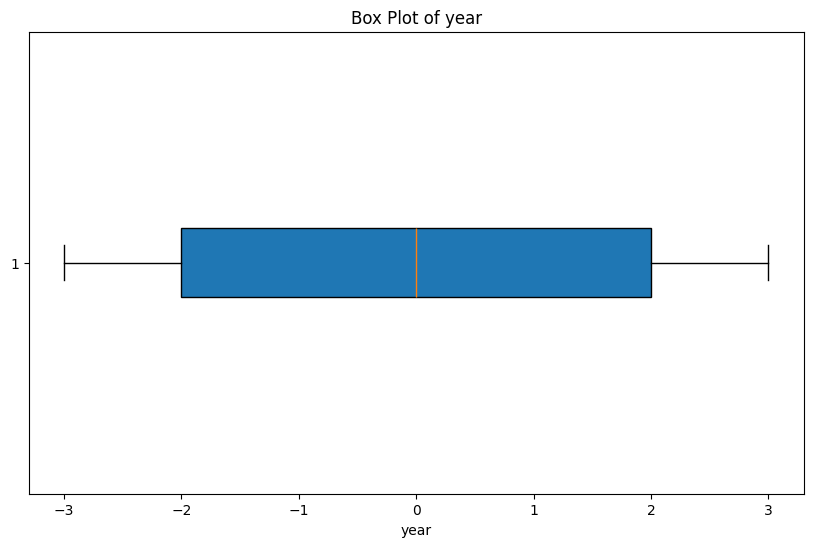

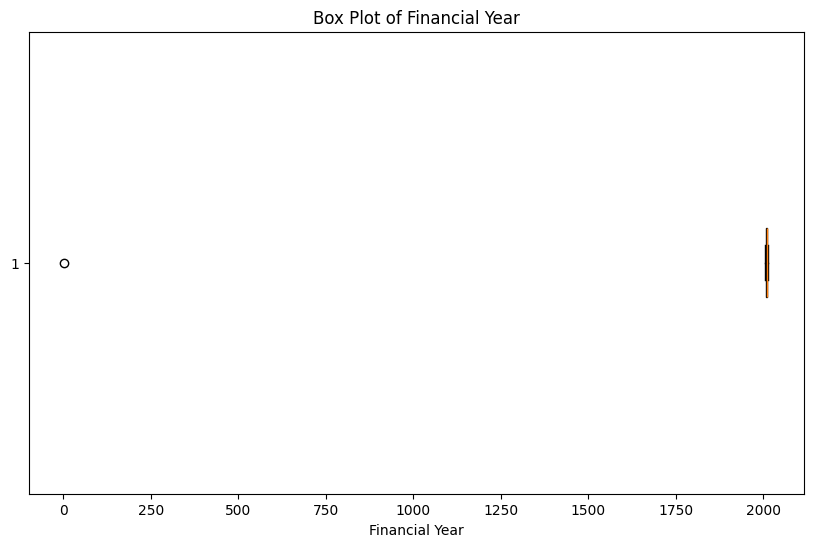

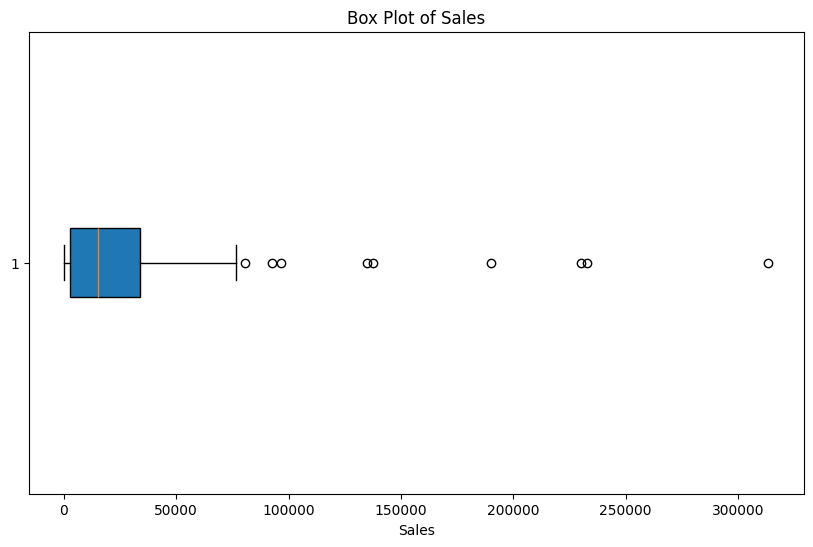

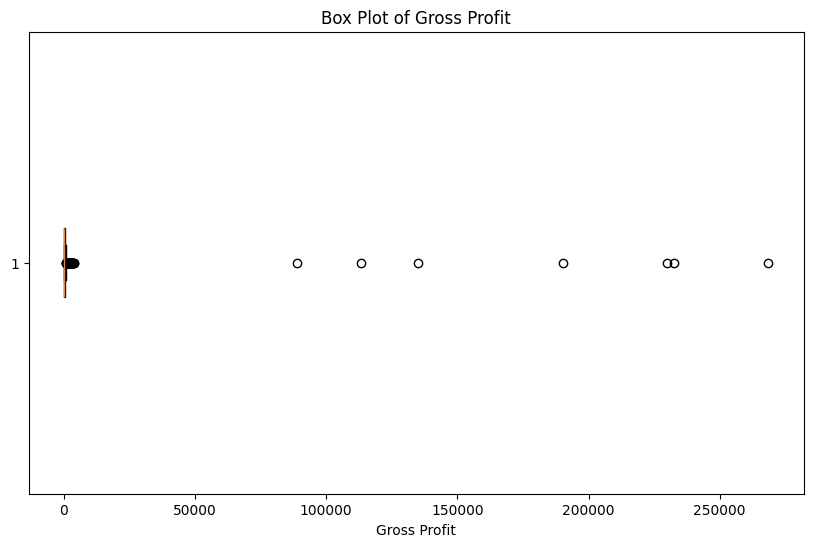

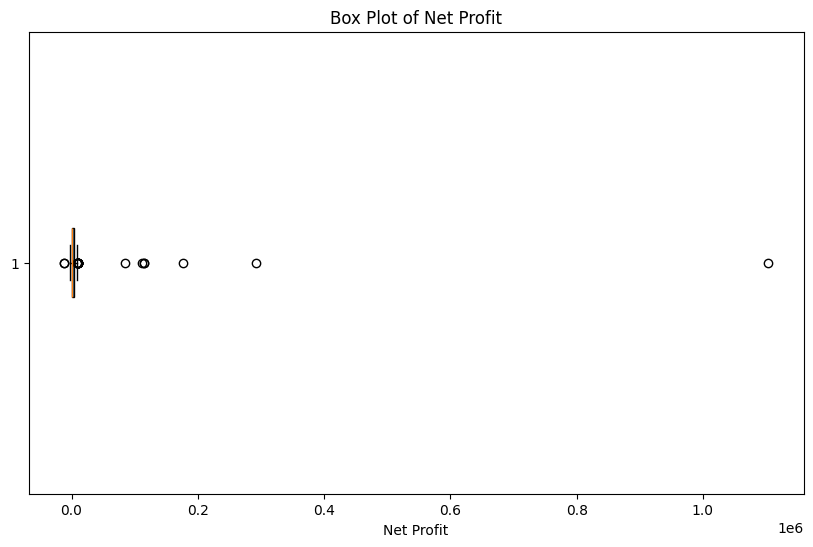

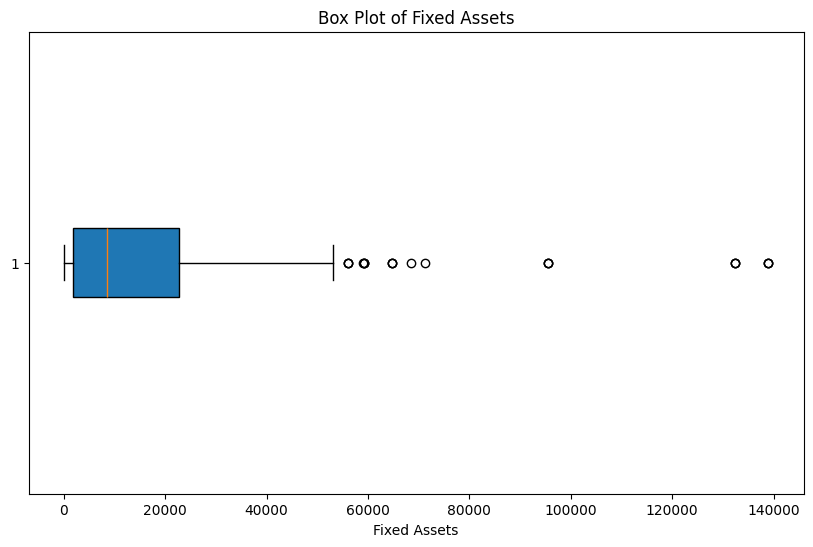

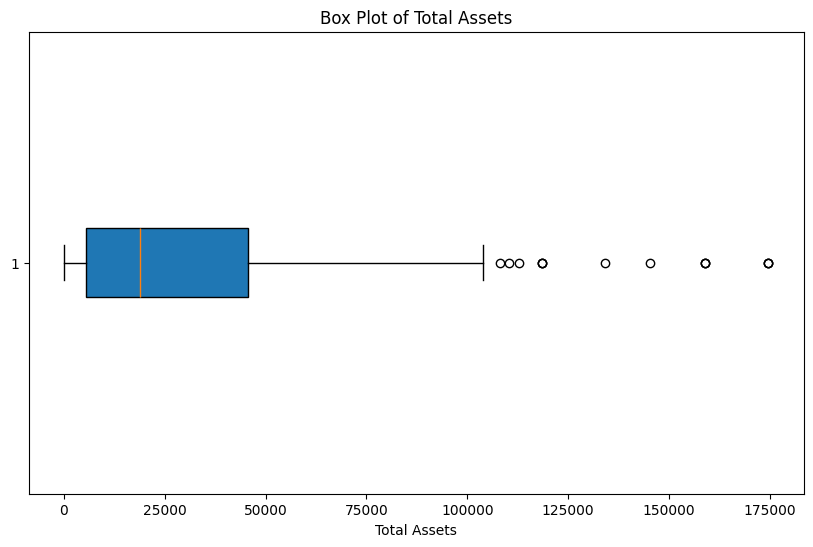

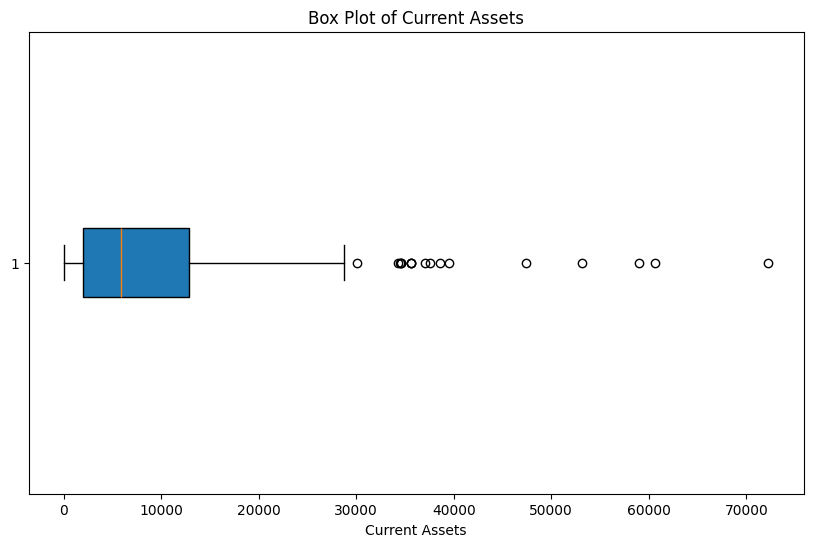

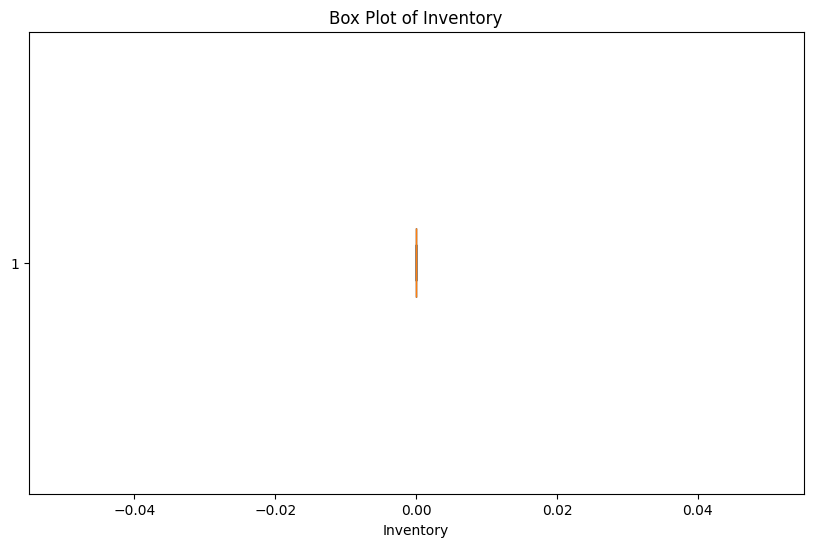

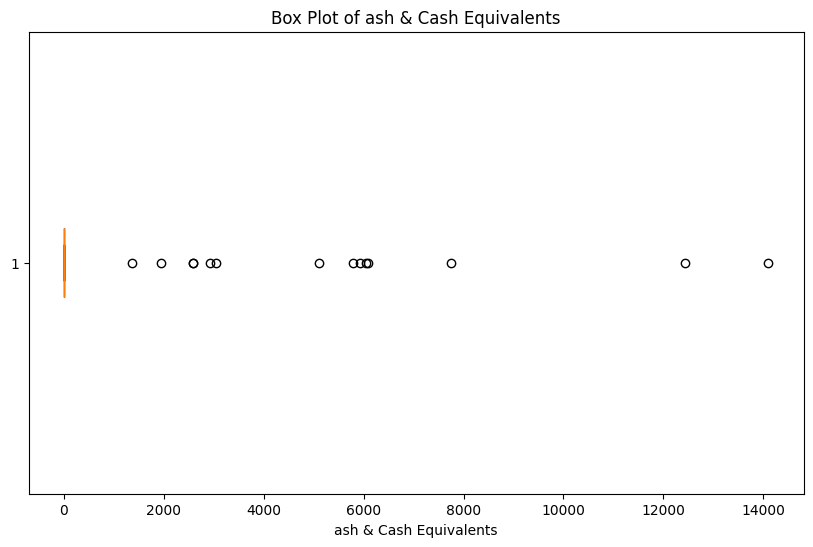

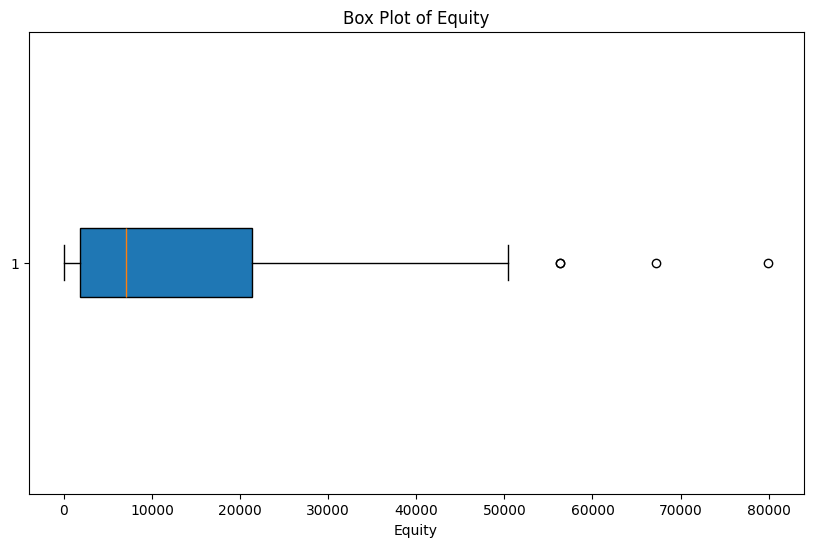

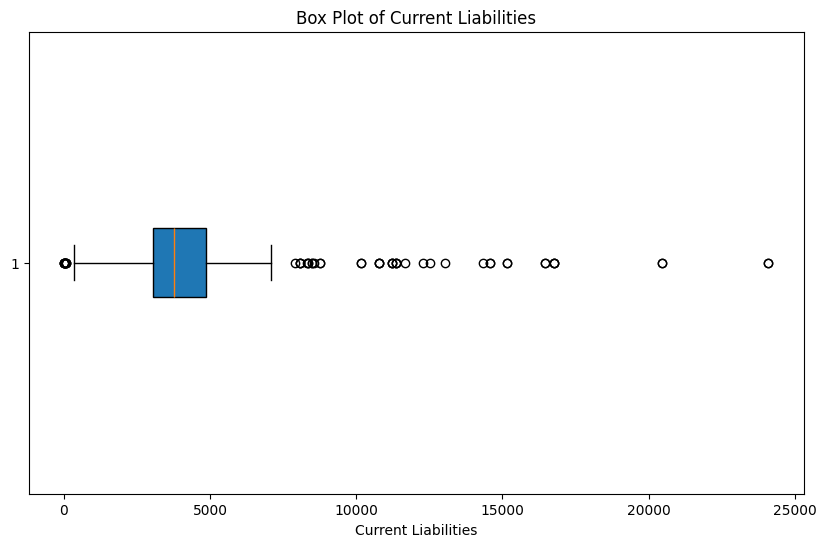

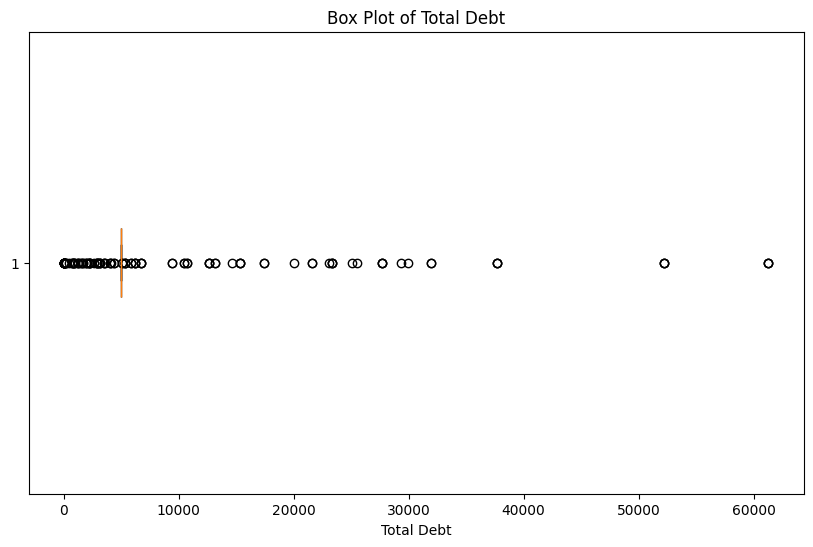

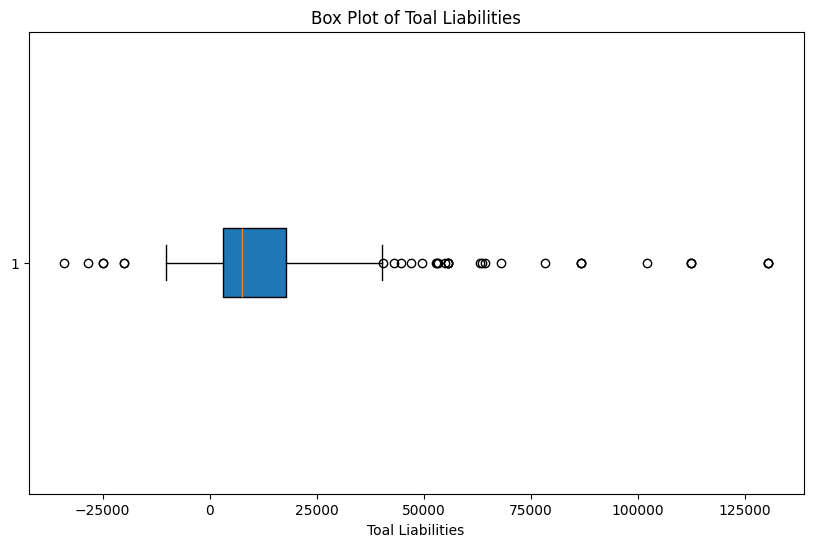

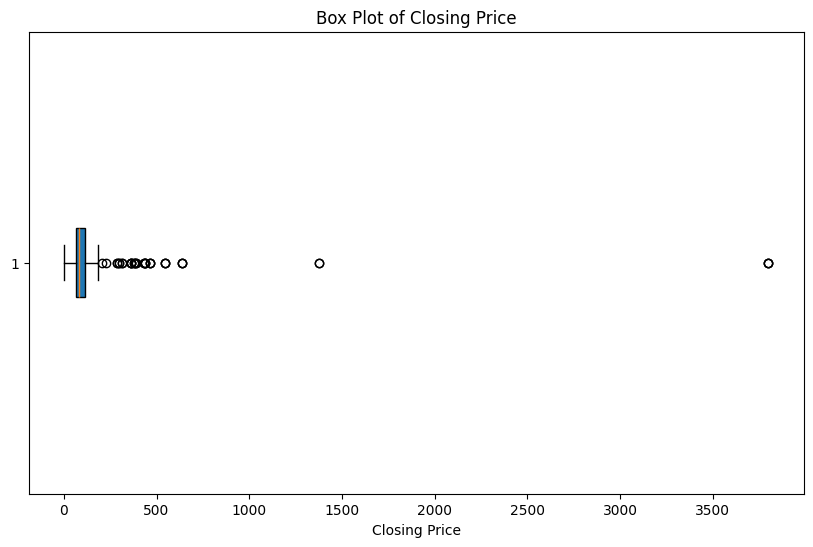

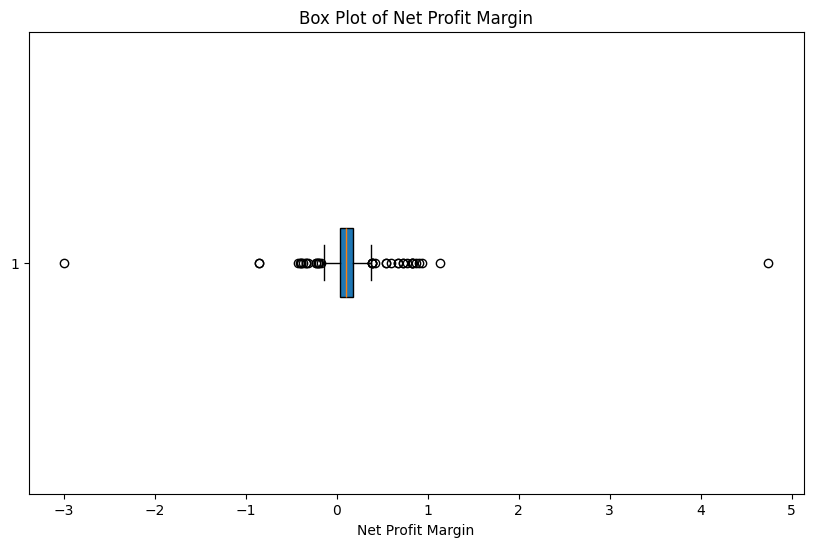

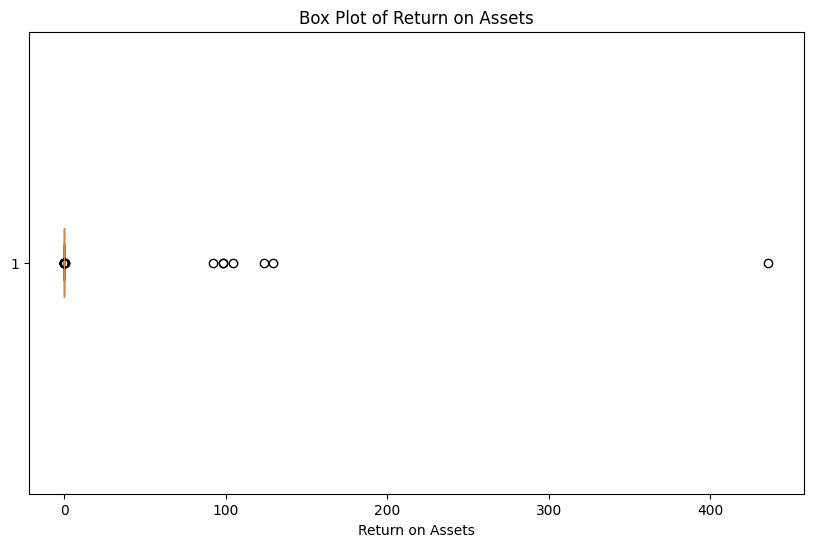

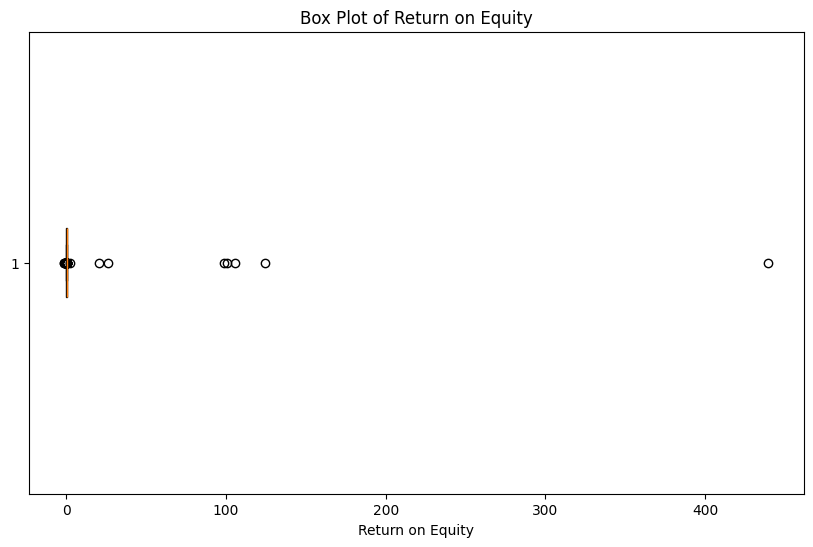

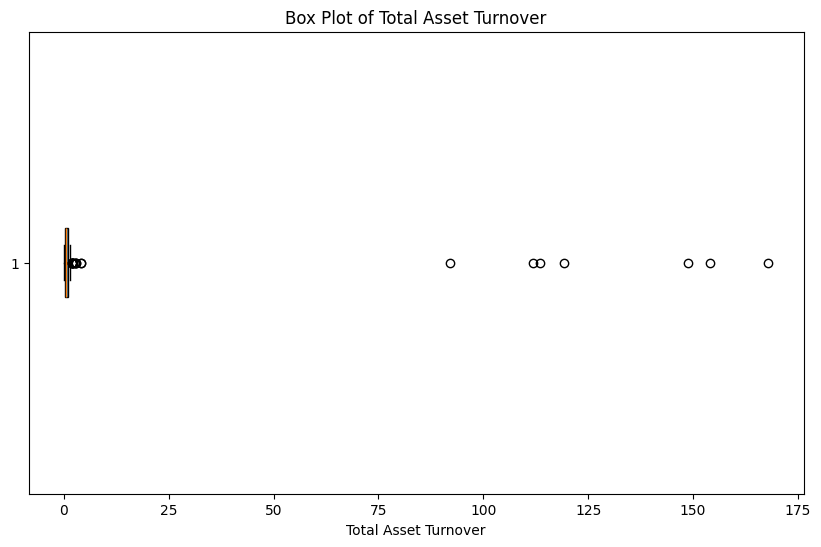

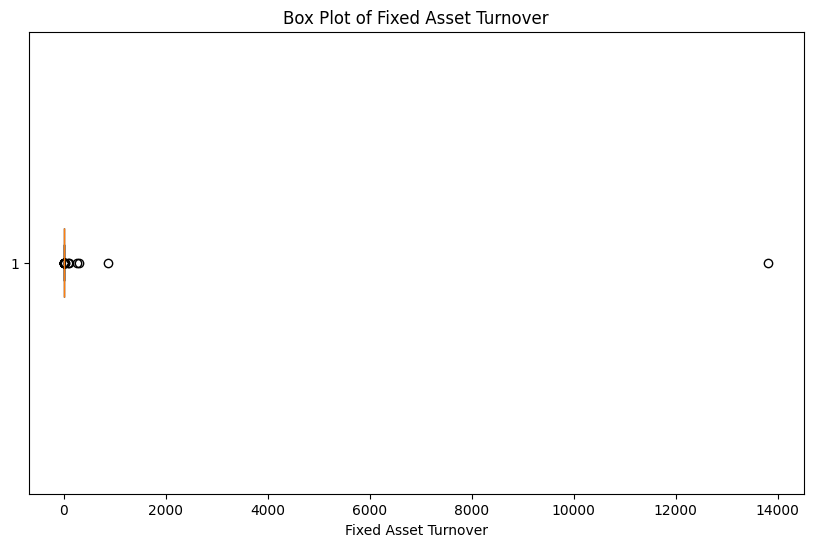

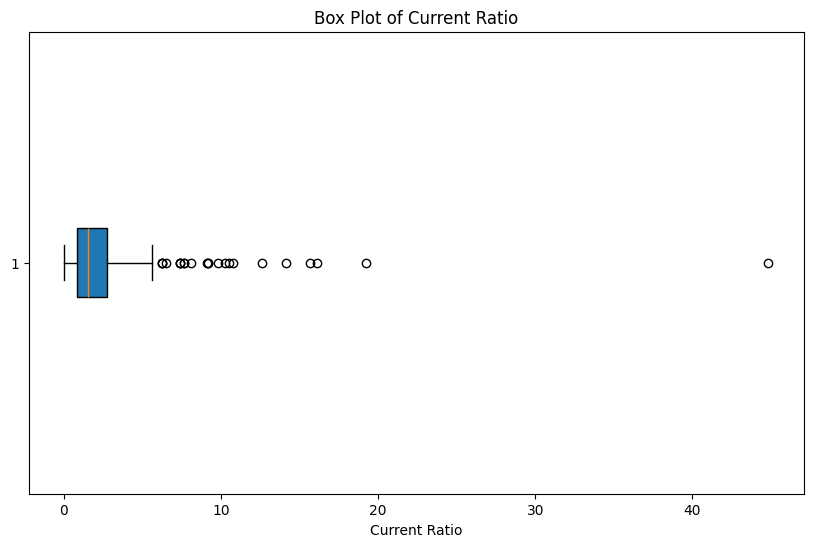

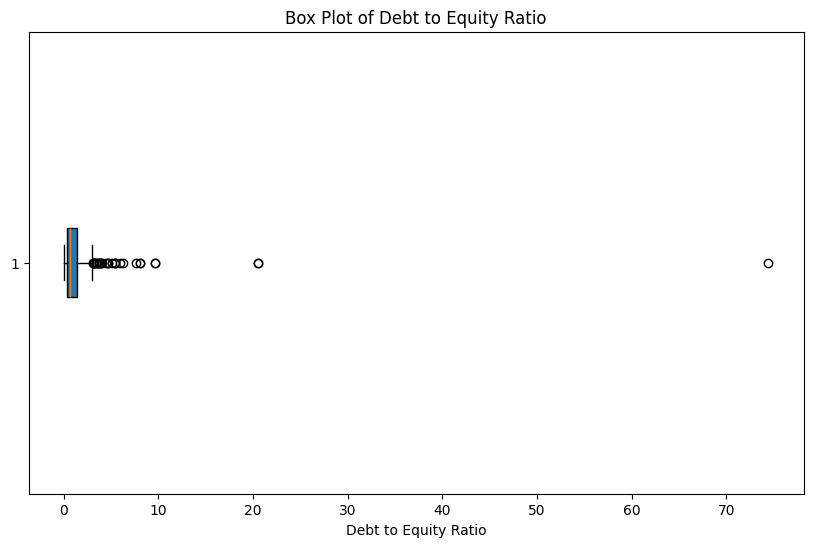

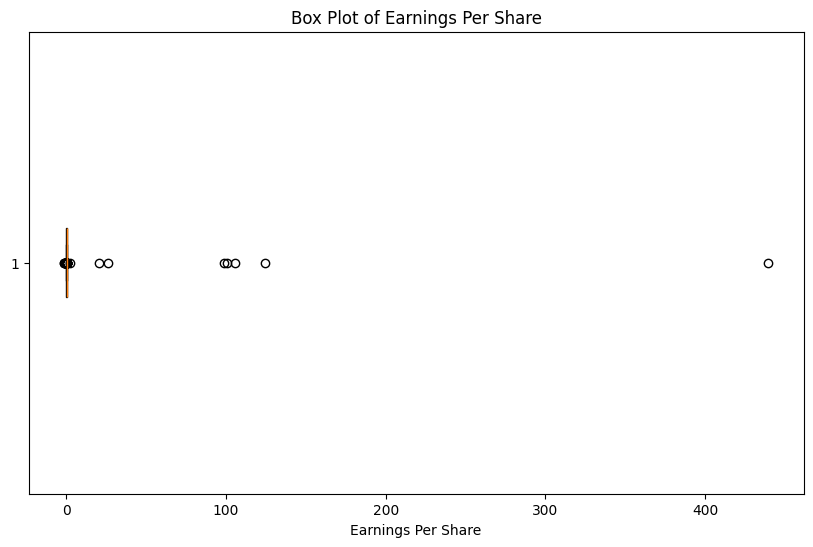

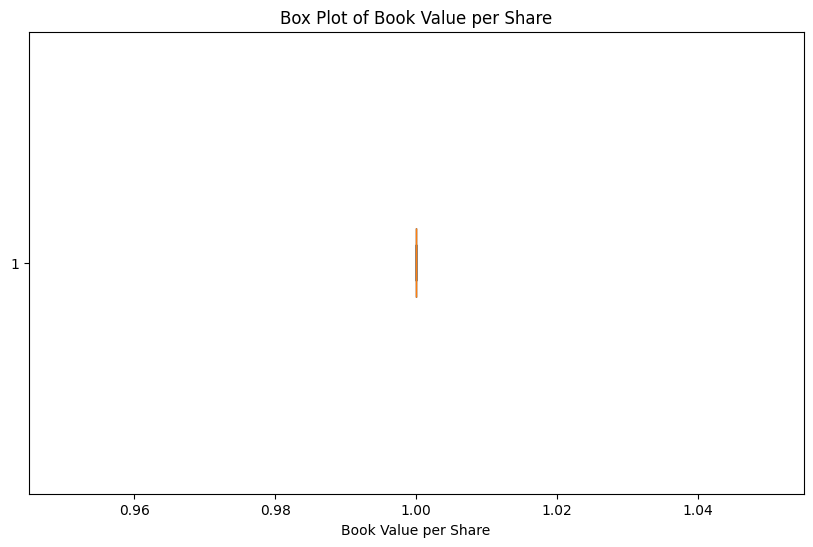

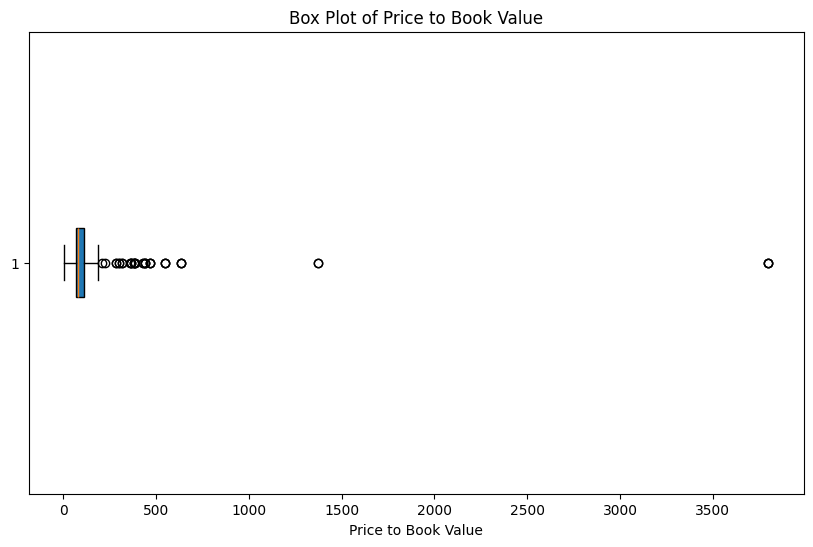

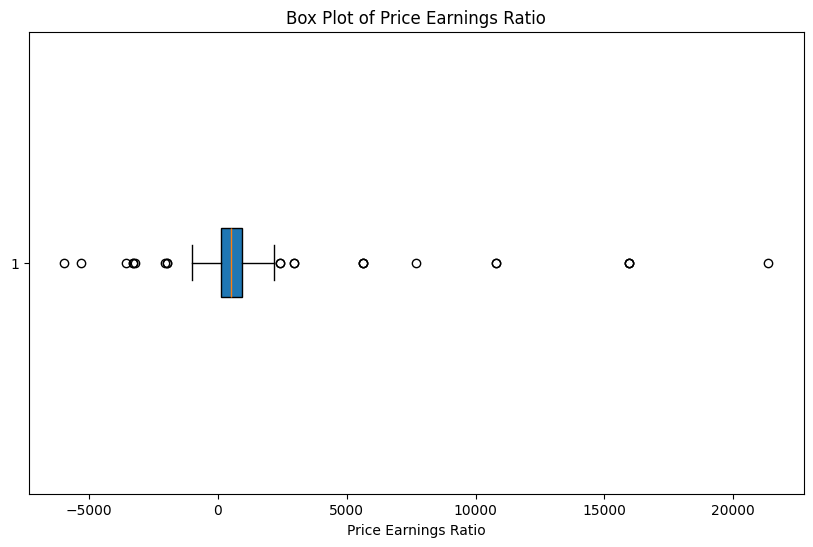

In [ ]:
# Select numeric columns
numeric_columns = financial_ratios.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(financial_ratios[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load datasets
df_cleaned = pd.read_csv('/content/financial_ratios.csv')
#df_imputed = pd.read_csv('/content/financial_ratios_imputed.csv')

# Define a function to analyze the impact based on relative year
def analyze_impact_relative_year(df_cleaned, year_col, metrics):
    # Create a flag for pre- and post-M&A periods
    df_cleaned['Pre_Post'] = np.where(df_cleaned[year_col] < 0, 'Pre-M&A', 'Post-M&A')

    # Aggregate metrics by pre- and post-M&A periods
    results = {}
    for metric in metrics:
        pre_data = df_cleaned[df_cleaned['Pre_Post'] == 'Pre-M&A'][metric]
        post_data = df_cleaned[df_cleaned['Pre_Post'] == 'Post-M&A'][metric]

        # Calculate mean, standard deviation, and perform t-test
        results[metric] = {
            'Pre-M&A Mean': np.mean(pre_data),
            'Post-M&A Mean': np.mean(post_data),
            'Pre-M&A Std': np.std(pre_data),
            'Post-M&A Std': np.std(post_data),
            'T-test P-value': ttest_ind(pre_data, post_data, nan_policy='omit').pvalue
        }

    return pd.DataFrame(results).T

# Metrics to analyze
metrics = [
    'Net Profit Margin', 'Return on Assets', 'Return on Equity',
    'Total Asset Turnover', 'Fixed Asset Turnover', 'Current Ratio',
    'Debt to Equity Ratio', 'Earnings Per Share', 'Price to Book Value', 'Price Earnings Ratio'
]

# Analyze impact for both datasets
results_cleaned = analyze_impact_relative_year(df_cleaned, 'year', metrics)
#results_imputed = analyze_impact_relative_year(df_imputed, 'year', metrics)

# Save results
results_cleaned.to_csv('/content/impact_analysis_cleaned_relative_year.csv')
#results_imputed.to_csv('/content/impact_analysis_imputed_relative_year.csv')

# Notify the user
print("Impact analysis completed:")
print("- Cleaned dataset results: impact_analysis_cleaned_relative_year.csv")
print("- Imputed dataset results: impact_analysis_imputed_relative_year.csv")
###



# Analyze impact
#results_cleaned = analyze_impact(df_cleaned, 'Start Date', 'Financial Year', metrics, start_date=2020)
#results_imputed = analyze_impact(df_imputed, 'Start Date', 'Financial Year', metrics, start_date=2020)

# Display results
print("Impact Analysis for Cleaned Dataset:")
results_cleaned

#print("\nImpact Analysis for Imputed Dataset:")
#print(results_imputed)


Impact analysis completed:
- Cleaned dataset results: impact_analysis_cleaned_relative_year.csv
- Imputed dataset results: impact_analysis_imputed_relative_year.csv
Impact Analysis for Cleaned Dataset:


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2


Pre-M&A Mean  Post-M&A Mean  Pre-M&A Std  Post-M&A Std  \
Net Profit Margin         0.123198       0.139432     0.241807      0.553996   
Return on Assets          3.391050       6.014957    18.697496     41.616821   
Return on Equity          3.472266       4.756465    18.863661     39.779484   
Total Asset Turnover      4.740823       4.709479    22.174533     23.405814   
Fixed Asset Turnover           inf            inf          NaN           NaN   
Current Ratio             2.497369       2.663644     4.885845      3.318991   
Debt to Equity Ratio      2.650759       1.165001     8.052087      1.570705   
Earnings Per Share        3.472266       4.756465    18.863661     39.779484   
Price to Book Value     221.794792     145.269944   653.514339    206.169649   
Price Earnings Ratio   1240.268934     711.906886  3636.802314   1812.425252   

                      T-test P-value  
Net Profit Margin           0.789435  
Return on Assets            0.567134  
Return on Equity            0.771105  
Total Asset Turnover        0.991952  
Fixed Asset Turnover             NaN  
Current Ratio               0.763246  
Debt to Equity Ratio        0.043811  
Earnings Per Share          0.771105  
Price to Book Value         0.216574  
Price Earnings Ratio        0.157516

In [ ]:
results_cleaned.to_csv('results_cleaned.csv')

In [ ]:
print(financial_ratios['Fixed Asset Turnover'].isnull().sum())

0


<ipython-input-32-41da96d0432e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[i], max(pre_means[i], post_means[i]) + 0.1,


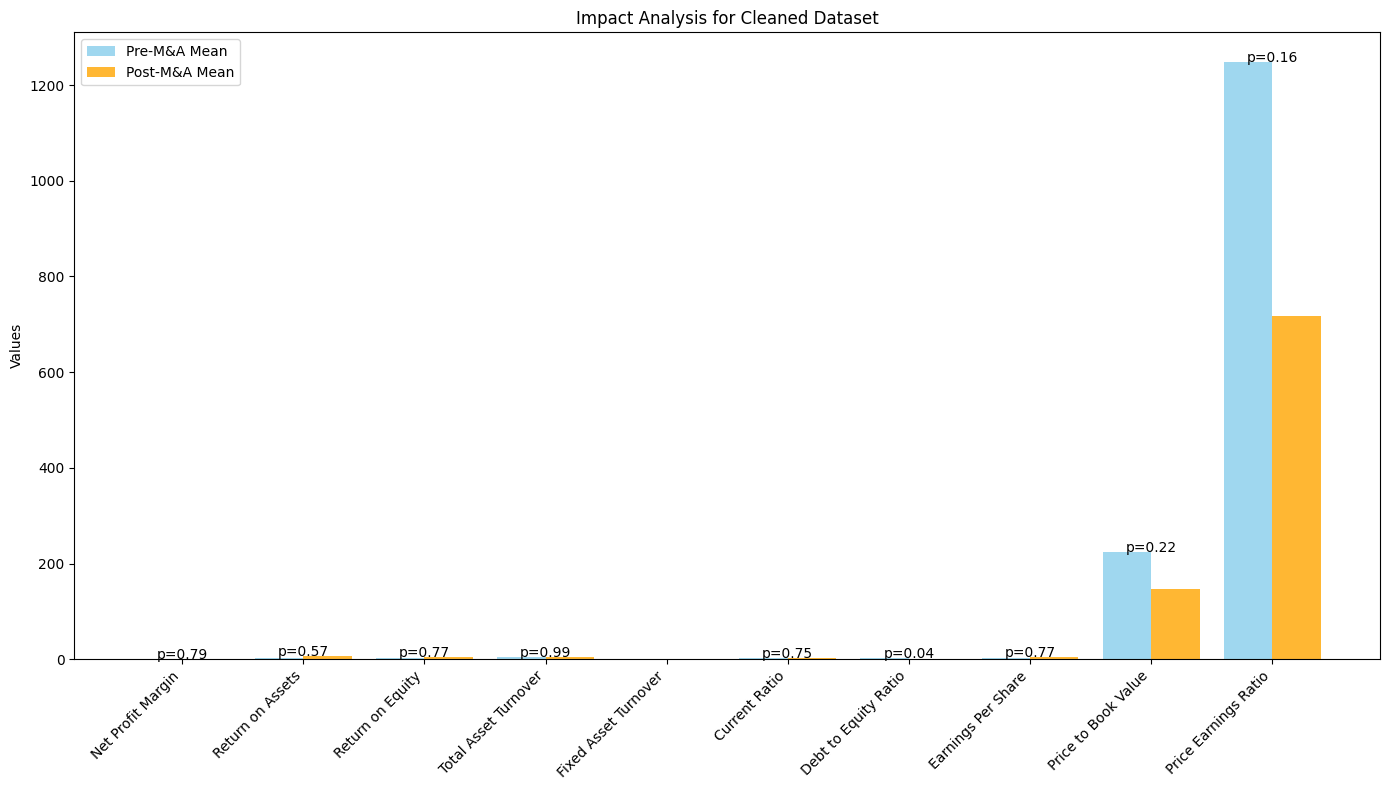

<ipython-input-32-41da96d0432e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[i], max(pre_means[i], post_means[i]) + 0.1,


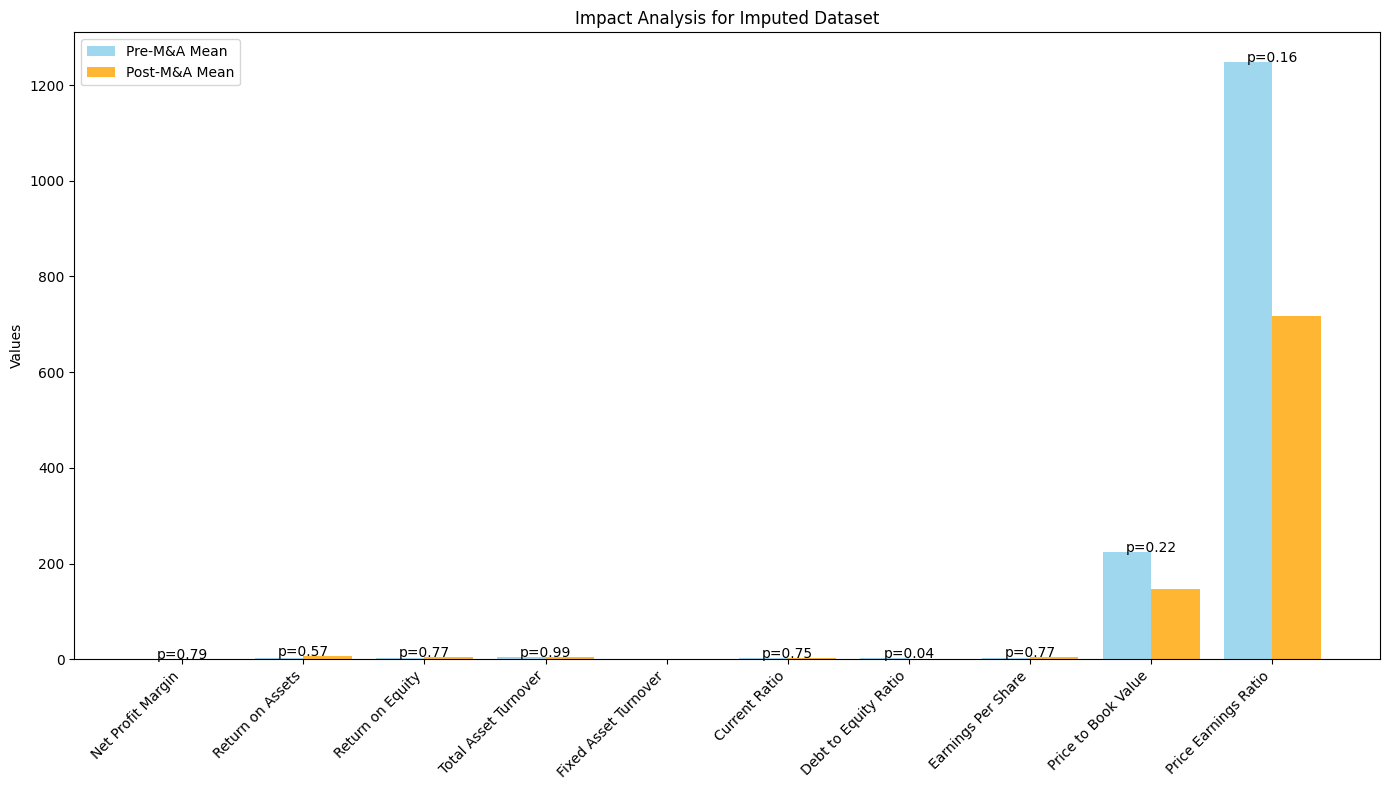

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize pre- and post-M&A results
def visualize_impact(results, title):
    # Metrics to plot
    metrics = results.index
    pre_means = results['Pre-M&A Mean']
    post_means = results['Post-M&A Mean']
    p_values = results['T-test P-value']

    # Create bar positions
    x = np.arange(len(metrics))

    # Plot the bar chart
    plt.figure(figsize=(14, 8))
    width = 0.4  # Width of bars
    plt.bar(x - width / 2, pre_means, width=width, label='Pre-M&A Mean', alpha=0.8, color='skyblue')
    plt.bar(x + width / 2, post_means, width=width, label='Post-M&A Mean', alpha=0.8, color='orange')

    # Add p-value annotations
    for i, p_val in enumerate(p_values):
        plt.text(
            x[i], max(pre_means[i], post_means[i]) + 0.1,
            f'p={p_val:.2f}' if not np.isnan(p_val) else 'NaN',
            ha='center', fontsize=10
        )

    # Add labels and title
    plt.xticks(x, metrics, rotation=45, ha='right')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize results for cleaned dataset
visualize_impact(results_cleaned, "Impact Analysis for Cleaned Dataset")

# Visualize results for imputed dataset
visualize_impact(results_imputed, "Impact Analysis for Imputed Dataset")


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon
# Filter data for pre-M&A (-3 to -1) and post-M&A (0 to +1) years
pre_mna = df_cleaned [df_cleaned ['year'].isin([-3, -2, -1])]
post_mna = df_cleaned [df_cleaned ['year'].isin([1, 2, 3])]

# Group by 'Acquirer Name' to calculate average metrics pre- and post-M&A
pre_mna_avg = pre_mna.groupby('Acquirer Name').mean(numeric_only=True)
post_mna_avg = post_mna.groupby('Acquirer Name').mean(numeric_only=True)

# Combine pre and post averages for paired analysis
merged = pre_mna_avg[['Sales', 'Net Profit', 'Equity']].join(
    post_mna_avg[['Sales', 'Net Profit', 'Equity']],
    lsuffix='_pre', rsuffix='_post'
).dropna()

# Initialize results dictionary
metrics = ['Sales', 'Net Profit', 'Equity']
results = {'Metric': [], 'T-Statistic': [], 'P-Value (t-test)': [],
           'Wilcoxon Statistic': [], 'P-Value (Wilcoxon)': []}

# Perform paired t-test and Wilcoxon signed-rank test for each metric
for metric in metrics:
    pre_col = f"{metric}_pre"
    post_col = f"{metric}_post"

    # Paired t-test
    t_stat, p_ttest = ttest_rel(merged[pre_col], merged[post_col])

    # Wilcoxon signed-rank test
    try:
        w_stat, p_wilcoxon = wilcoxon(merged[pre_col], merged[post_col])
    except ValueError:  # Handle cases where no differences exist
        w_stat, p_wilcoxon = None, None

    # Append results
    results['Metric'].append(metric)
    results['T-Statistic'].append(t_stat)
    results['P-Value (t-test)'].append(p_ttest)
    results['Wilcoxon Statistic'].append(w_stat)
    results['P-Value (Wilcoxon)'].append(p_wilcoxon)

# Convert results to a DataFrame for better presentation
results_df = pd.DataFrame(results)

# Display the results
print("Pre-Post M&A Statistical Test Results")
print(results_df)

Pre-Post M&A Statistical Test Results
       Metric  T-Statistic  P-Value (t-test)  Wilcoxon Statistic  \
0       Sales    -3.708080          0.001158                18.0   
1  Net Profit    -1.140522          0.265806                 9.0   
2      Equity    -4.464765          0.000177                 0.0   

   P-Value (Wilcoxon)  
0        3.015995e-05  
1        3.933907e-06  
2        1.192093e-07  


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon

# Load the dataset
file_path = '/content/financial_ratios_cleaned.csv'  # Replace with the correct file path
financial_data = pd.read_csv(file_path)

# Segregate data into pre-M&A (-3 to -1) and post-M&A (0 to 1)
pre_mna_ratios = financial_data[financial_data['year'].isin([-3, -2, -1])]
post_mna_ratios = financial_data[financial_data['year'].isin([0, 1])]

# Group by 'Acquirer Name' and calculate mean ratios for pre- and post-M&A periods
pre_mna_avg_ratios = pre_mna_ratios.groupby('Acquirer Name').mean(numeric_only=True)
post_mna_avg_ratios = post_mna_ratios.groupby('Acquirer Name').mean(numeric_only=True)

# Select key financial ratios for analysis
key_ratios = [
    'Return on Assets', 'Return on Equity', 'Total Asset Turnover',
    'Fixed Asset Turnover', 'Current Ratio', 'Debt to Equity Ratio',
    'Earnings Per Share', 'Price to Book Value', 'Price Earnings Ratio'
]



# Combine pre- and post-M&A averages for paired analysis
ratios_merged = pre_mna_avg_ratios[key_ratios].join(
    post_mna_avg_ratios[key_ratios],
    lsuffix='_pre', rsuffix='_post'
).dropna()

# Perform paired t-test and Wilcoxon signed-rank test for each financial ratio
results = {'Metric': [], 'T-Statistic': [], 'P-Value (t-test)': [],
           'Wilcoxon Statistic': [], 'P-Value (Wilcoxon)': []}

for ratio in key_ratios:
    pre_col = f"{ratio}_pre"
    post_col = f"{ratio}_post"

    # Paired t-test
    t_stat, p_ttest = ttest_rel(ratios_merged[pre_col], ratios_merged[post_col])

    # Wilcoxon signed-rank test
    try:
        w_stat, p_wilcoxon = wilcoxon(ratios_merged[pre_col], ratios_merged[post_col])
    except ValueError:
        w_stat, p_wilcoxon = None, None  # Handle cases with no differences

    # Append results
    results['Metric'].append(ratio)
    results['T-Statistic'].append(t_stat)
    results['P-Value (t-test)'].append(p_ttest)
    results['Wilcoxon Statistic'].append(w_stat)
    results['P-Value (Wilcoxon)'].append(p_wilcoxon)

# Convert results to a DataFrame
ratios_results_df = pd.DataFrame(results)

# Display the results
print("Financial Ratios Pre-Post M&A Analysis Results")
print(ratios_results_df)


Financial Ratios Pre-Post M&A Analysis Results
                 Metric  T-Statistic  P-Value (t-test)  Wilcoxon Statistic  \
0      Return on Assets    -1.278985          0.213657               124.0   
1      Return on Equity     0.951237          0.351374               140.0   
2  Total Asset Turnover    -0.828062          0.416145               105.0   
3  Fixed Asset Turnover          NaN               NaN                88.0   
4         Current Ratio     0.394547          0.696812                71.0   
5  Debt to Equity Ratio     1.654694          0.111571                65.0   
6    Earnings Per Share     0.951237          0.351374               140.0   
7   Price to Book Value     0.790230          0.437466                46.0   
8  Price Earnings Ratio     0.515486          0.611133               138.0   

   P-Value (Wilcoxon)  
0            0.473166  
1            0.789838  
2            0.207617  
3            0.134134  
4            0.121847  
5            0.013779  
6   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y


In [ ]:
financial_ratios.describe().to_csv('financial_ratios_stats.csv')

In [ ]:
ratios_results_df

Metric  T-Statistic  P-Value (t-test)  Wilcoxon Statistic  \
0      Return on Assets    -1.278985          0.213657               124.0   
1      Return on Equity     0.951237          0.351374               140.0   
2  Total Asset Turnover    -0.828062          0.416145               105.0   
3  Fixed Asset Turnover          NaN               NaN                88.0   
4         Current Ratio     0.394547          0.696812                71.0   
5  Debt to Equity Ratio     1.654694          0.111571                65.0   
6    Earnings Per Share     0.951237          0.351374               140.0   
7   Price to Book Value     0.790230          0.437466                46.0   
8  Price Earnings Ratio     0.515486          0.611133               138.0   

   P-Value (Wilcoxon)  
0            0.473166  
1            0.789838  
2            0.207617  
3            0.134134  
4            0.121847  
5            0.013779  
6            0.789838  
7            0.683091  
8            0.746926

<ipython-input-56-4aeb0ef7f388>:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = df_sorted[metrics].pct_change() * 100  # Convert to percentage
<ipython-input-56-4aeb0ef7f388>:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = df_sorted[metrics].pct_change() * 100  # Convert to percentage


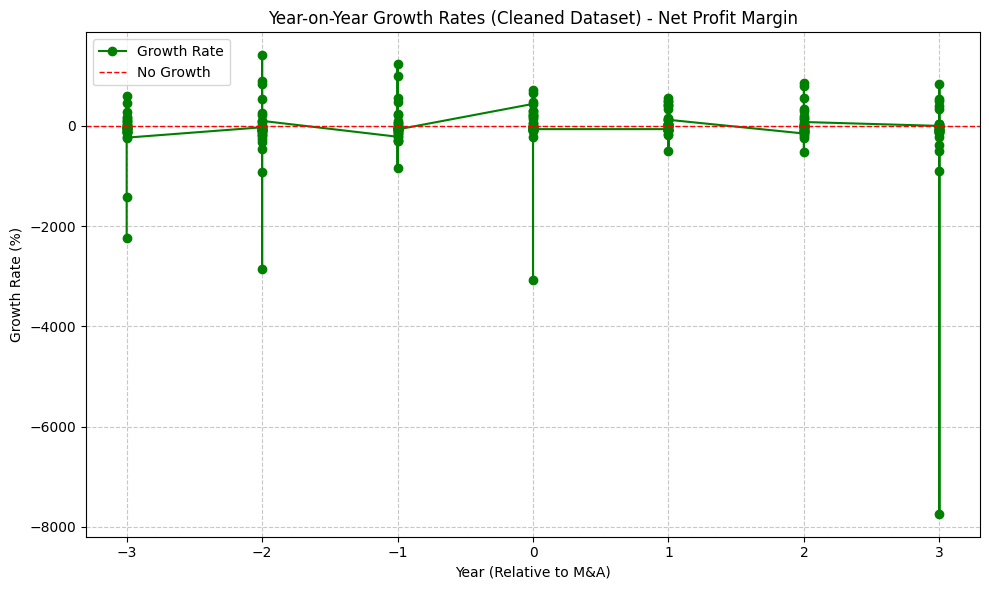

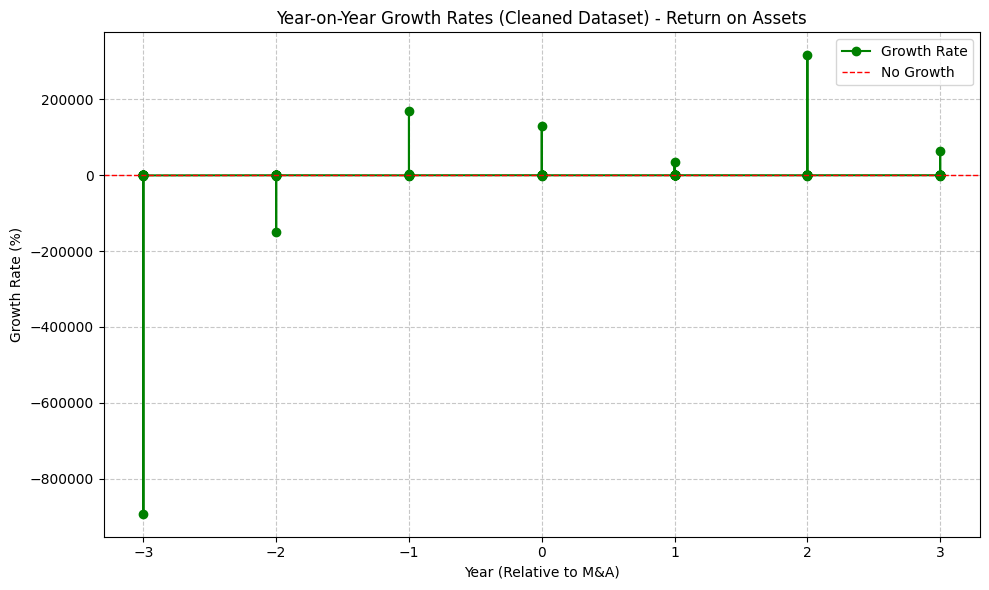

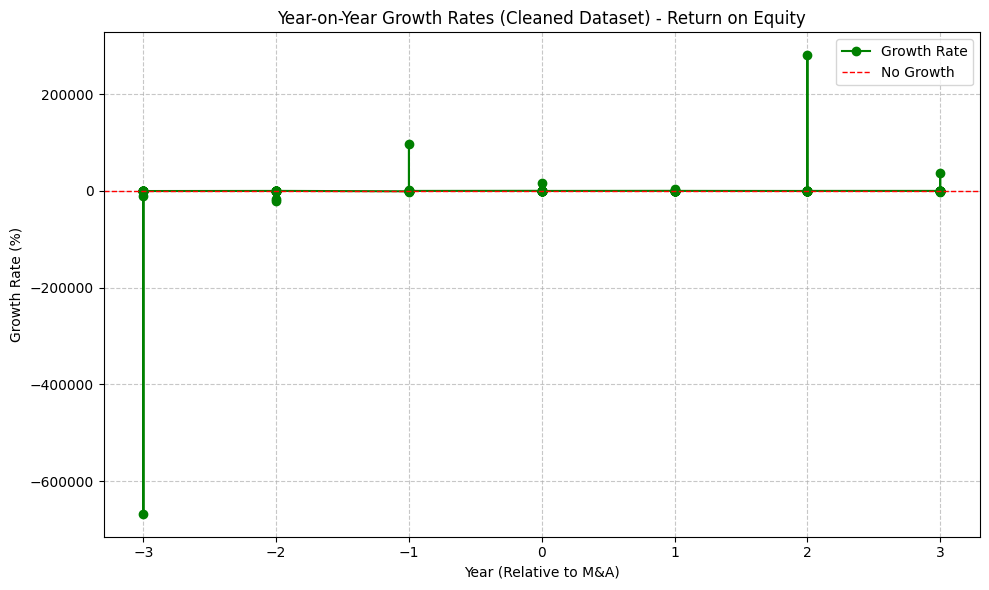

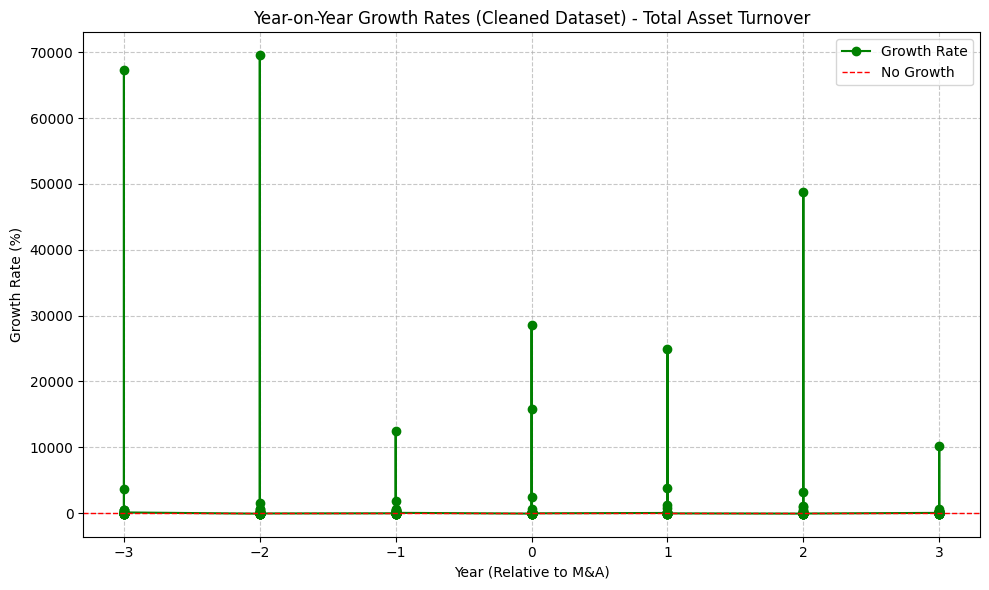

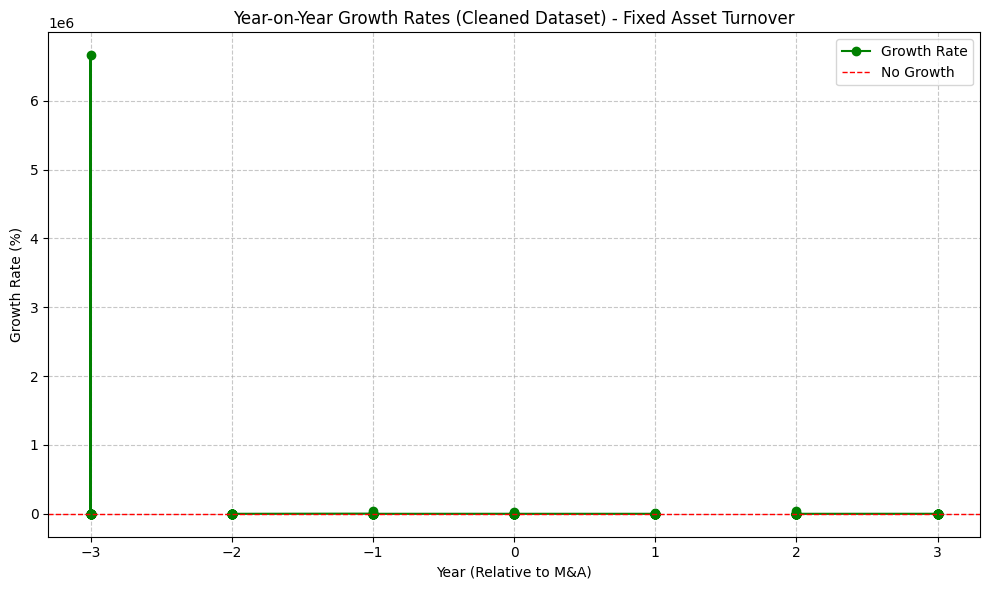

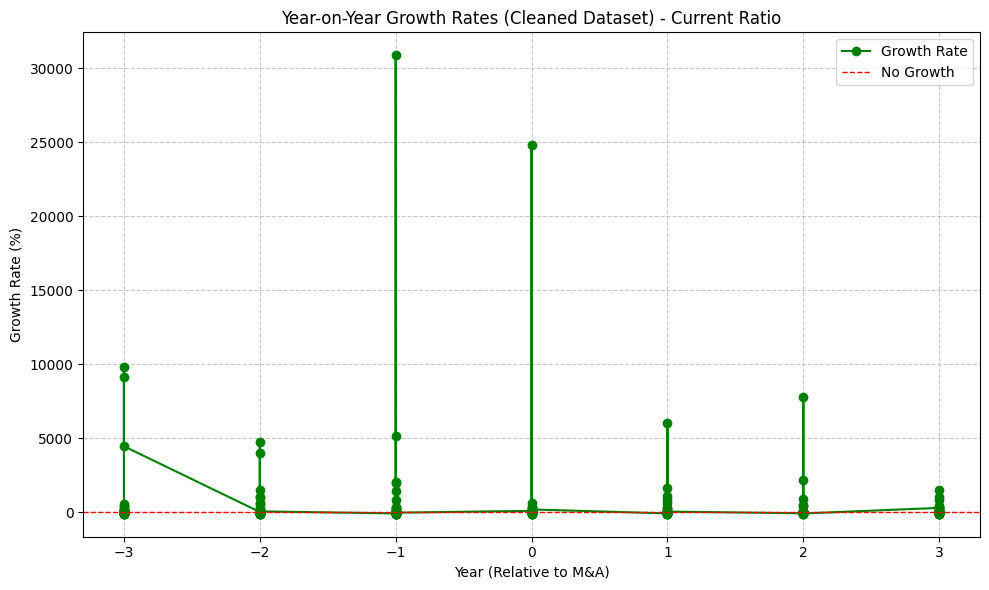

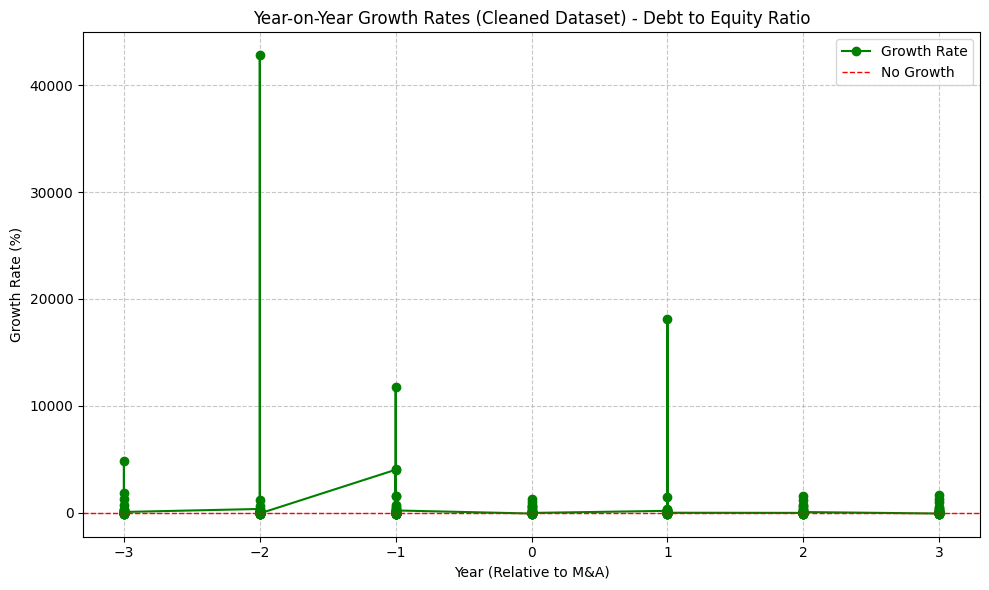

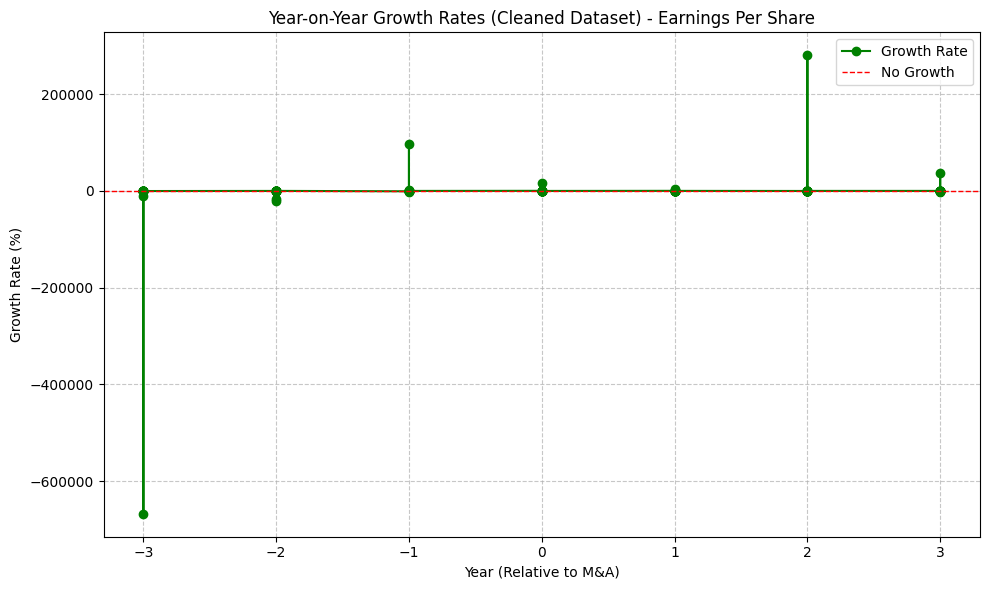

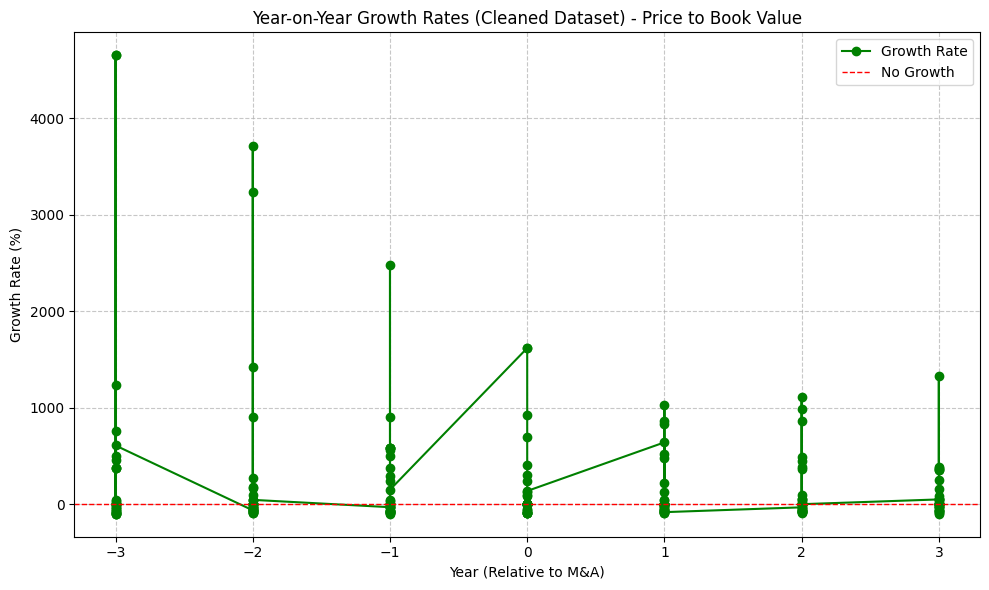

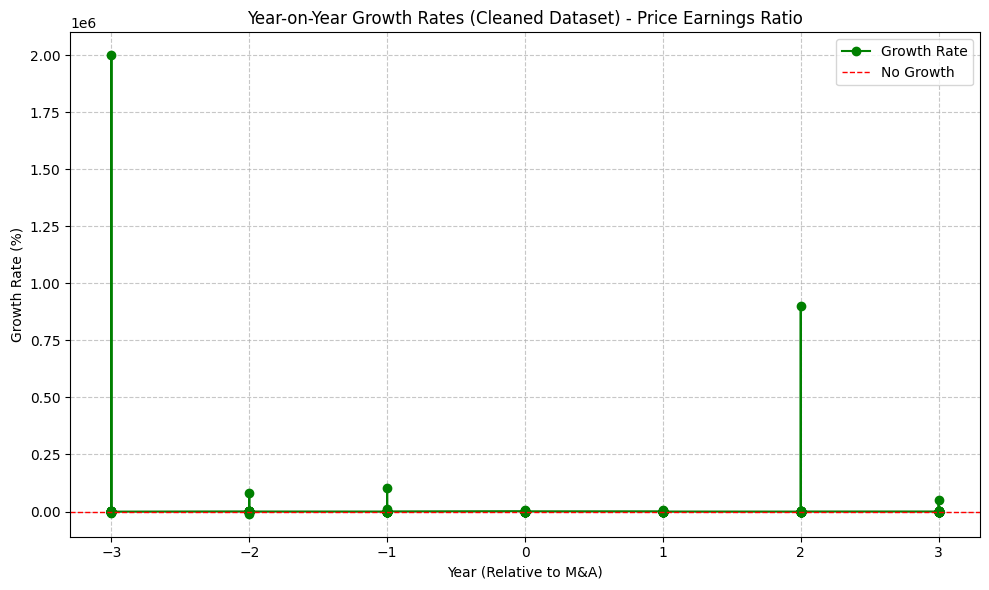

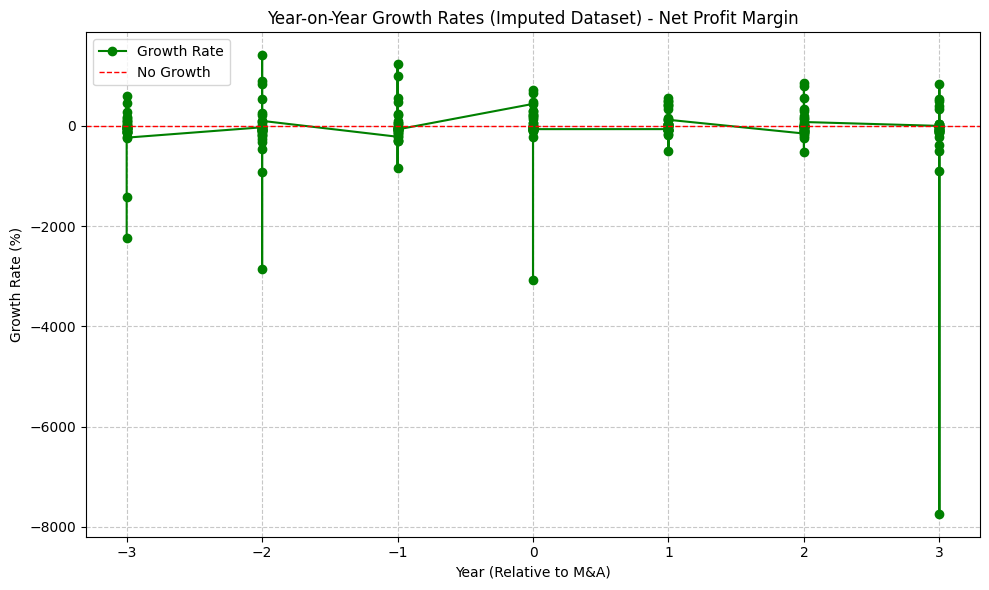

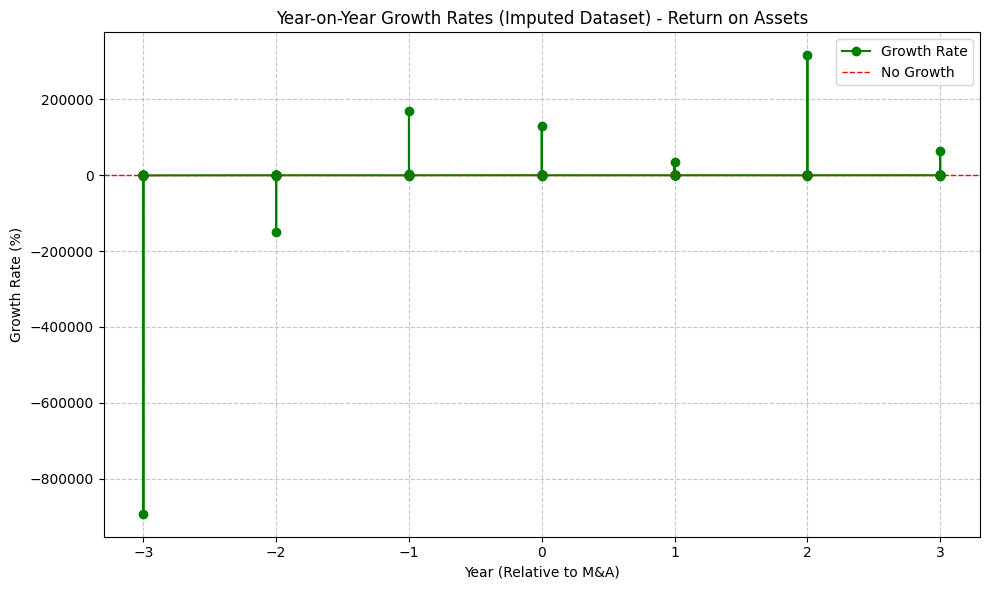

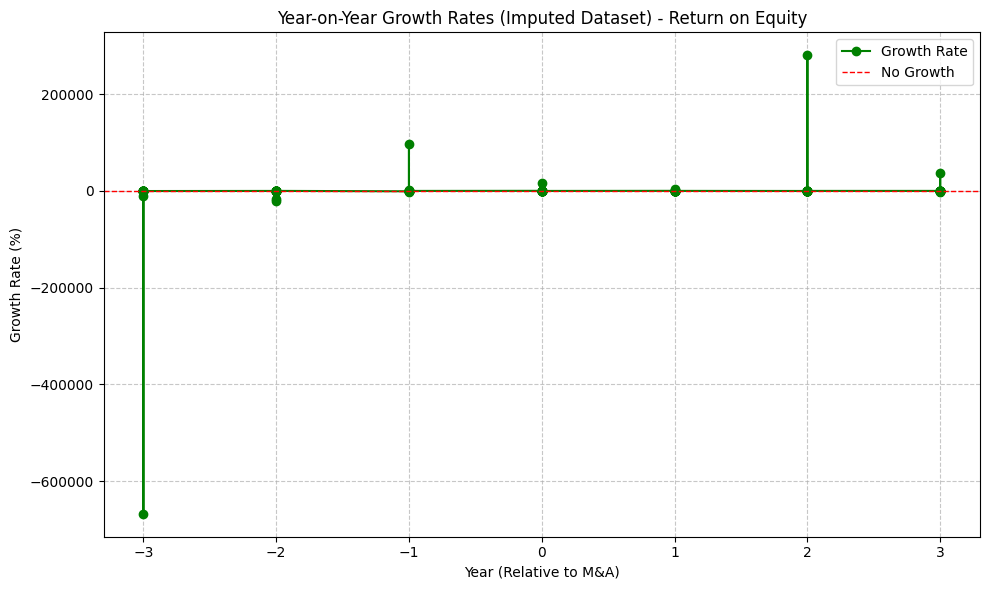

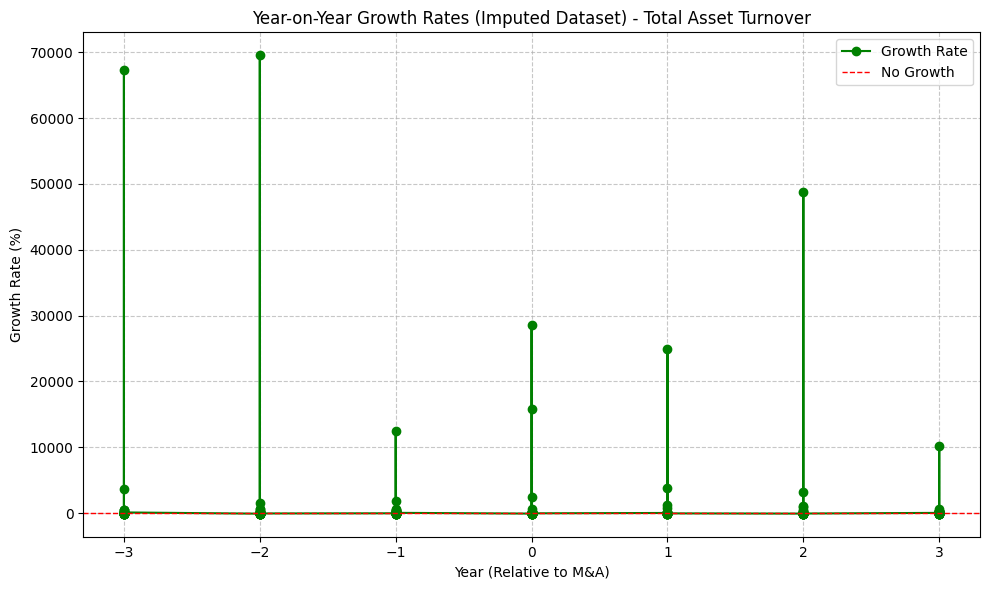

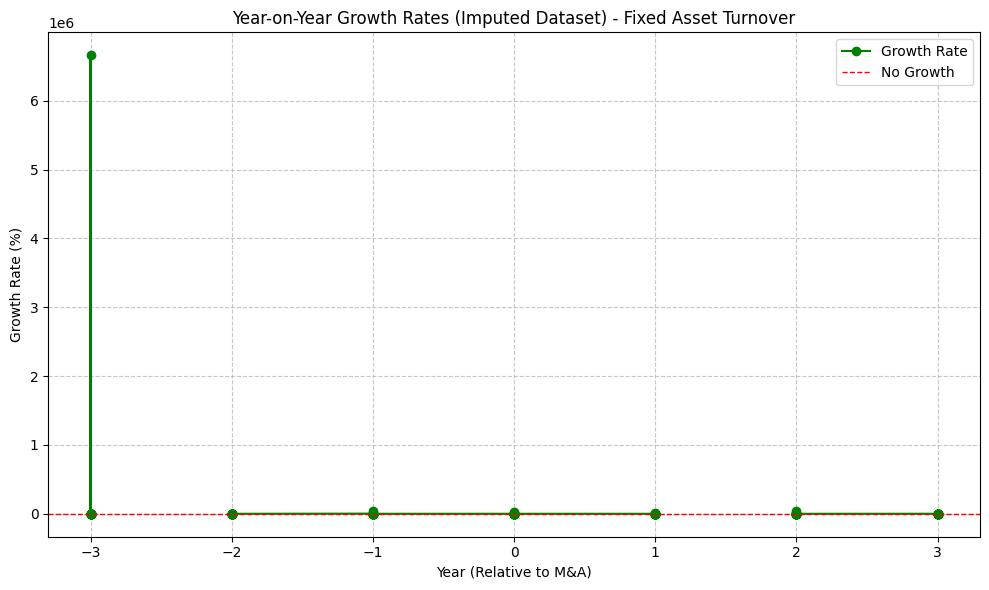

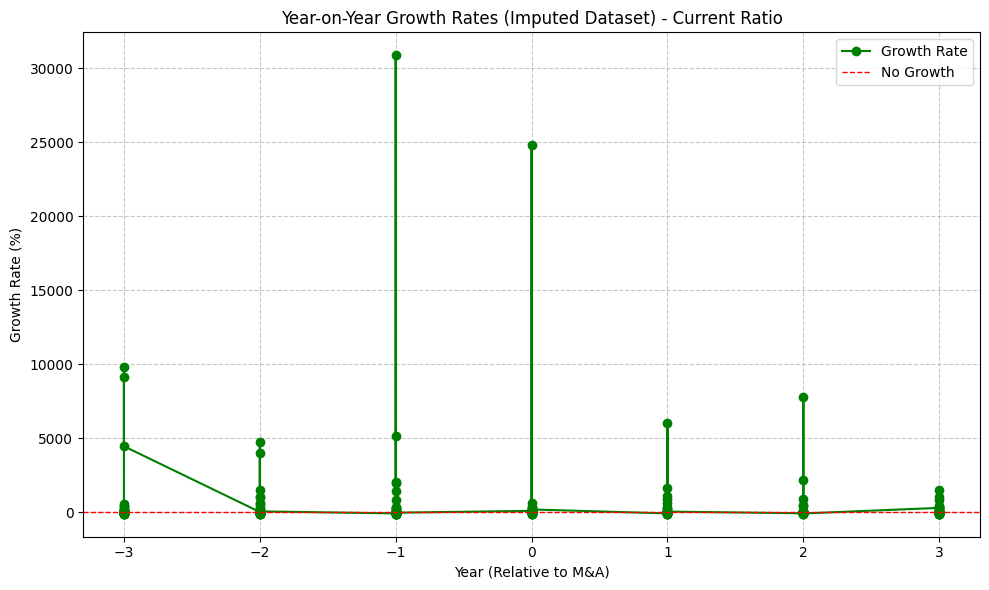

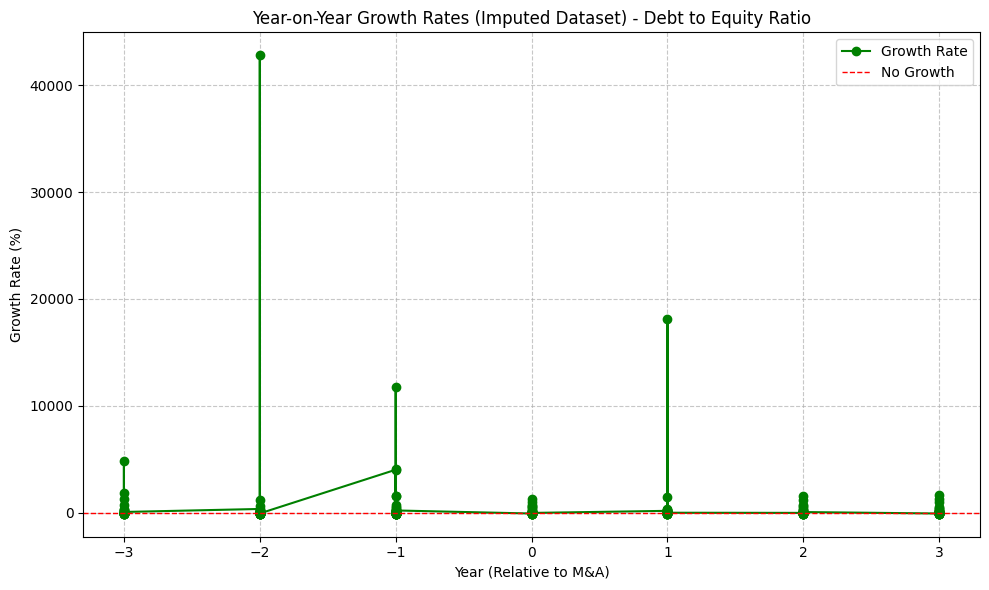

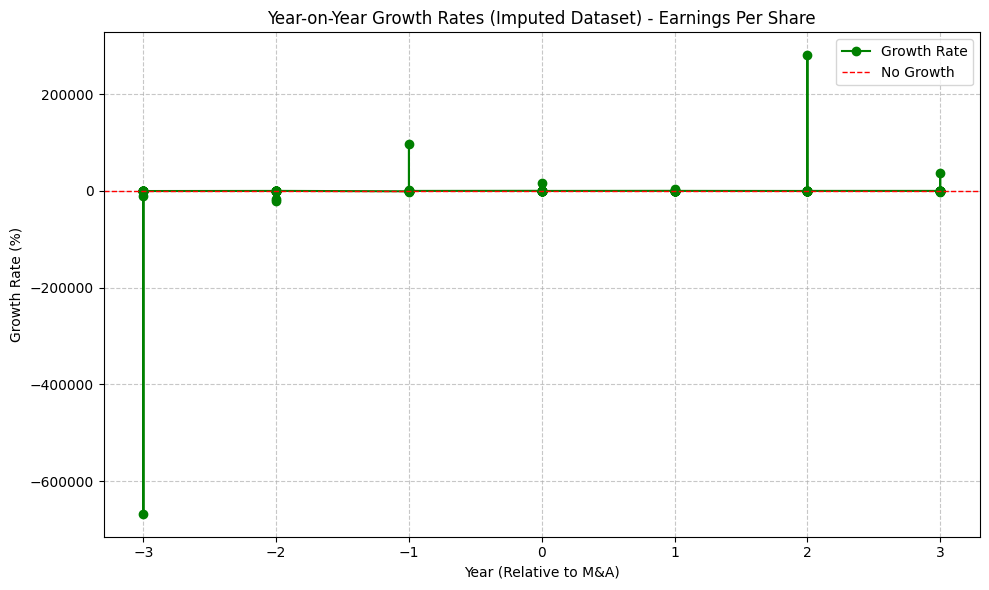

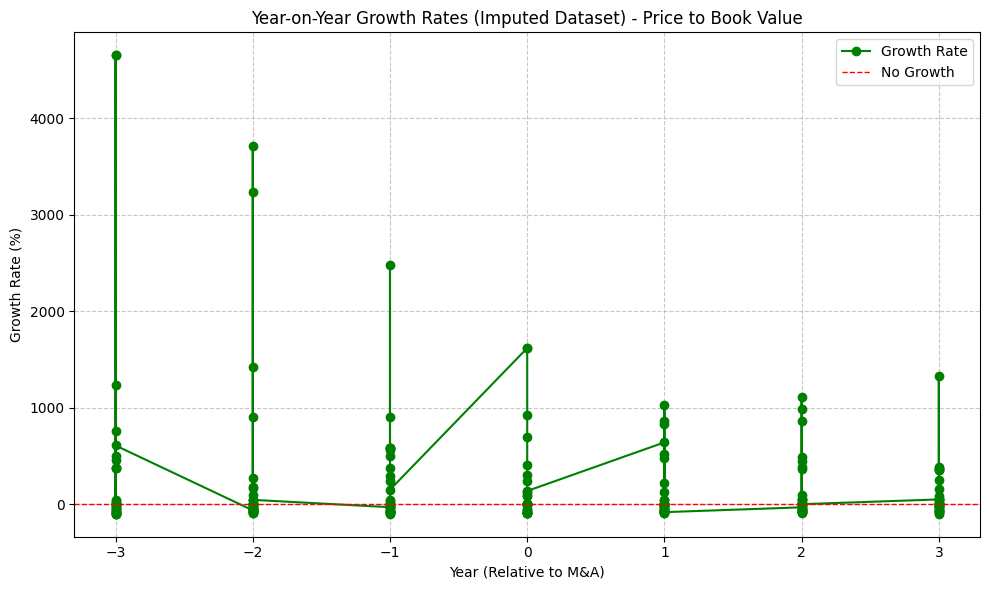

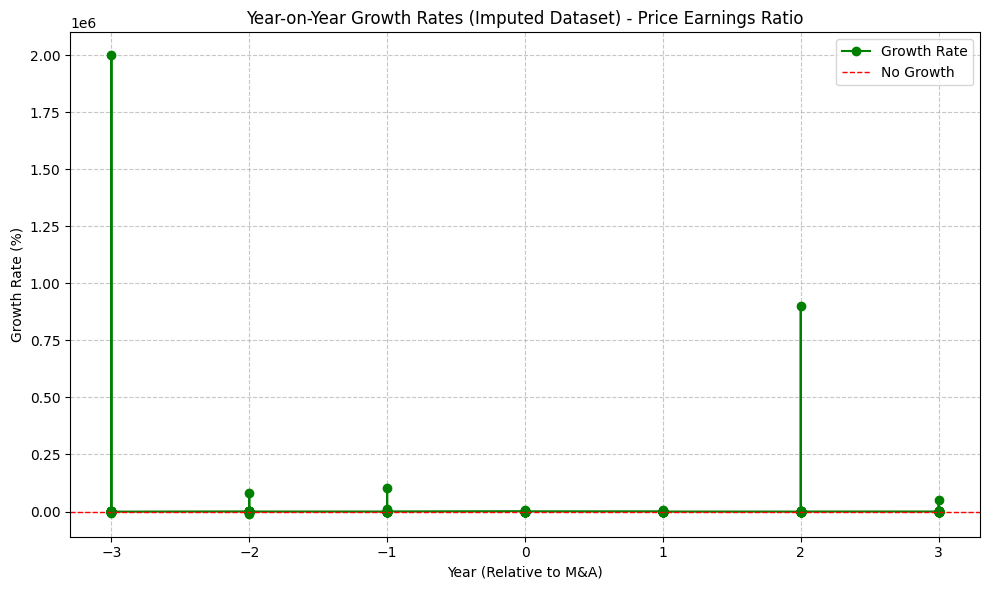

In [ ]:
# Function to calculate year-wise growth rates
def calculate_yearly_growth(df, year_col, metrics):
    # Sort by year and calculate percentage change for each metric
    df_sorted = df.sort_values(by=year_col)
    growth_rates = df_sorted[metrics].pct_change() * 100  # Convert to percentage
    growth_rates[year_col] = df_sorted[year_col].values  # Retain the year column
    return growth_rates

# Compute year-wise growth rates for cleaned and imputed datasets
growth_rates_cleaned = calculate_yearly_growth(df_cleaned, 'year', metrics)
growth_rates_imputed = calculate_yearly_growth(df_imputed, 'year', metrics)

# Function to visualize growth rates for a specific metric
def visualize_growth_rates(growth_rates, year_col, metric, title):
    plt.figure(figsize=(10, 6))
    plt.plot(growth_rates[year_col], growth_rates[metric], marker='o', color='green', label='Growth Rate')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='No Growth')
    plt.title(f"{title} - {metric}")
    plt.xlabel('Year (Relative to M&A)')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize year-wise growth rates for each metric in cleaned dataset
for metric in metrics:
    visualize_growth_rates(growth_rates_cleaned, 'year', metric, "Year-on-Year Growth Rates (Cleaned Dataset)")

# Visualize year-wise growth rates for each metric in imputed dataset
for metric in metrics:
    visualize_growth_rates(growth_rates_imputed, 'year', metric, "Year-on-Year Growth Rates (Imputed Dataset)")


In [ ]:
# Load both cleaned datasets
financial_ratios_data = pd.read_csv('/content/financial_ratios_cleaned (1).csv')
#cleaned_imputed_dataset = pd.read_csv('/content/cleaned_dataset_imputed_no_flags.csv')
financial_ratios_data

year Financial Year           Start Date             End Date  \
0      -3      2014/2015  2014-01-04 00:00:00           03/31/2015   
1      -2      2014/2015  2014-01-04 00:00:00           03/31/2015   
2      -1      2014/2015  2014-01-04 00:00:00           03/31/2015   
3       0      2014/2015  2014-01-04 00:00:00           03/31/2015   
4       1      2014/2015  2014-01-04 00:00:00           03/31/2015   
..    ...            ...                  ...                  ...   
218    -1      2012/2013           31/08/2012  2013-12-31 00:00:00   
219     0      2012/2013           31/08/2012  2013-12-31 00:00:00   
220     1      2012/2013           31/08/2012  2013-12-31 00:00:00   
221     2      2012/2013           31/08/2012  2013-12-31 00:00:00   
222     3      2012/2013           31/08/2012  2013-12-31 00:00:00   

              Acquirer Name    Sales  Gross Profit  Net Profit  Fixed Assets  \
0            ACL Cables PLC    983.0           0.0       -31.0          76.0   
1            ACL Cables PLC    956.0           0.0      -371.0          95.0   
2            ACL Cables PLC   1803.0           0.0      -379.0          94.0   
3            ACL Cables PLC   1328.0           0.0       222.0         328.0   
4            ACL Cables PLC   2123.0           0.0      1151.0         681.0   
..                      ...      ...           ...         ...           ...   
218  Expolanka Holdings PLC  21327.0           0.0      5415.0       30441.0   
219  Expolanka Holdings PLC  34628.0           0.0      9542.0       59290.0   
220  Expolanka Holdings PLC  66079.0           0.0      2629.0       95532.0   
221  Expolanka Holdings PLC  76162.0           0.0      9655.0      132469.0   
222  Expolanka Holdings PLC  76617.0           0.0      7966.0      138985.0   

     Total Assets  ...  Return on Assets  Return on Equity  \
0          3061.0  ...         -0.010127         -0.024276   
1          4474.0  ...         -0.082924         -0.597424   
2          4350.0  ...         -0.087126         -1.559671   
3          5753.0  ...          0.038589          0.427746   
4          3156.0  ...          0.364702          0.652864   
..            ...  ...               ...               ...   
218       40008.0  ...          0.135348          0.266460   
219       79487.0  ...          0.120045          0.398363   
220      118531.0  ...          0.022180          0.082824   
221      159019.0  ...          0.060716          0.207402   
222      174603.0  ...          0.045624          0.180259   

     Total Asset Turnover  Fixed Asset Turnover  Current Ratio  \
0                0.321137             12.934211       1.210868   
1                0.213679             10.063158       1.025798   
2                0.414483             19.180851       0.830357   
3                0.230836              4.048780       0.791304   
4                0.672687              3.117474       1.605882   
..                    ...                   ...            ...   
218              0.533068              0.700601       2.880759   
219              0.435644              0.584045       4.260970   
220              0.557483              0.691695       2.048361   
221              0.478949              0.574942       2.465410   
222              0.438807              0.551261       2.124545   

     Debt to Equity Ratio  Earnings Per Share  Book Value per Share  \
0                3.906813           -0.024276                   1.0   
1                8.033816           -0.597424                   1.0   
2               20.530864           -1.559671                   1.0   
3                9.612717            0.427746                   1.0   
4                2.829836            0.652864                   1.0   
..                    ...                 ...                   ...   
218              0.245497            0.266460                   1.0   
219              0.974408            0.398363                   1.0   
220              1.186567 

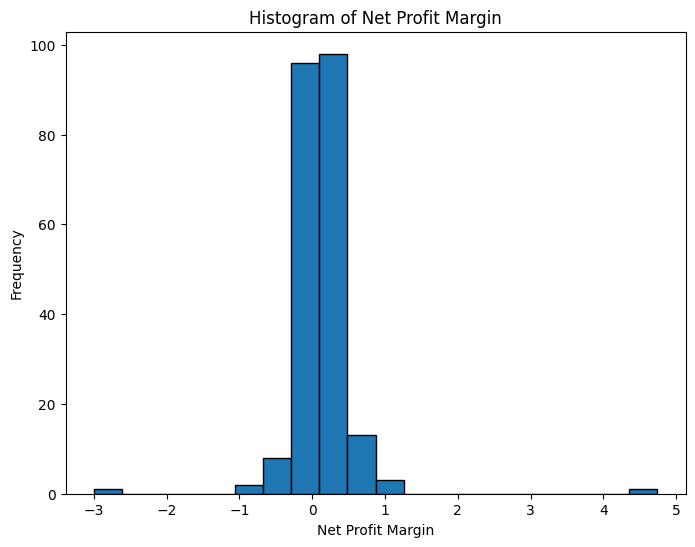

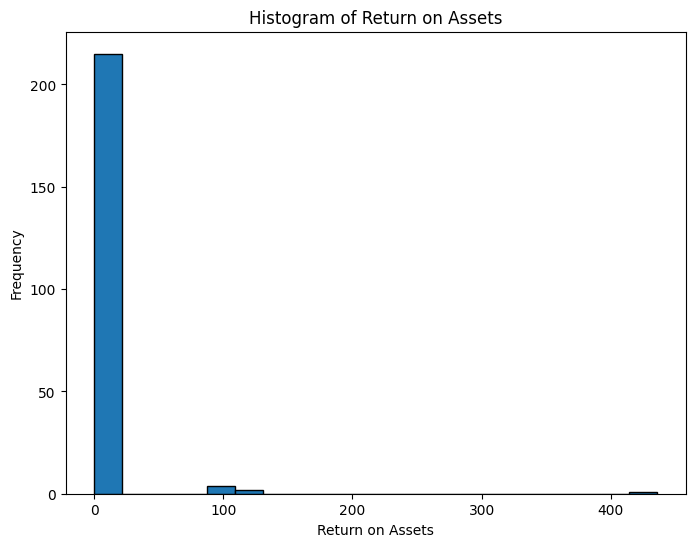

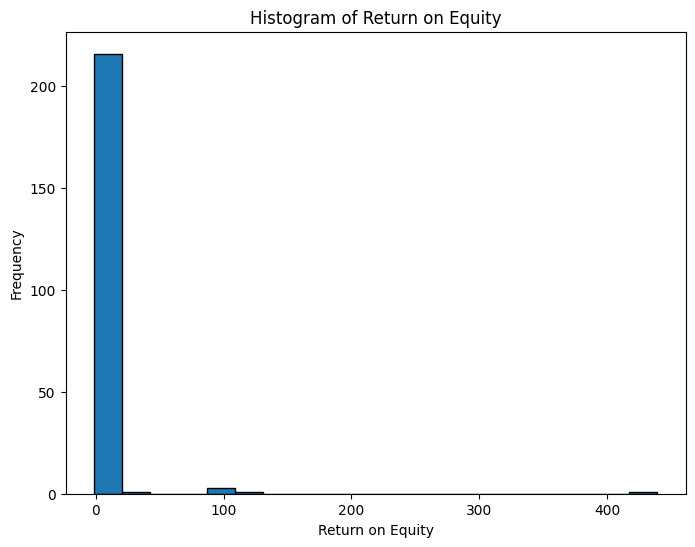

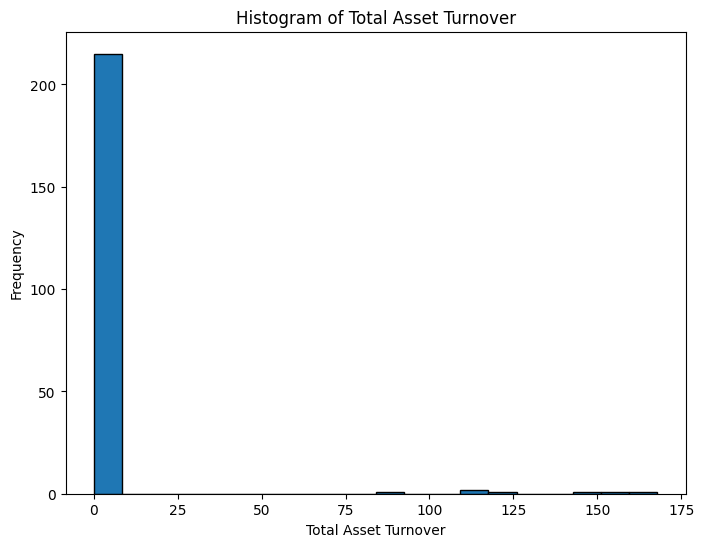

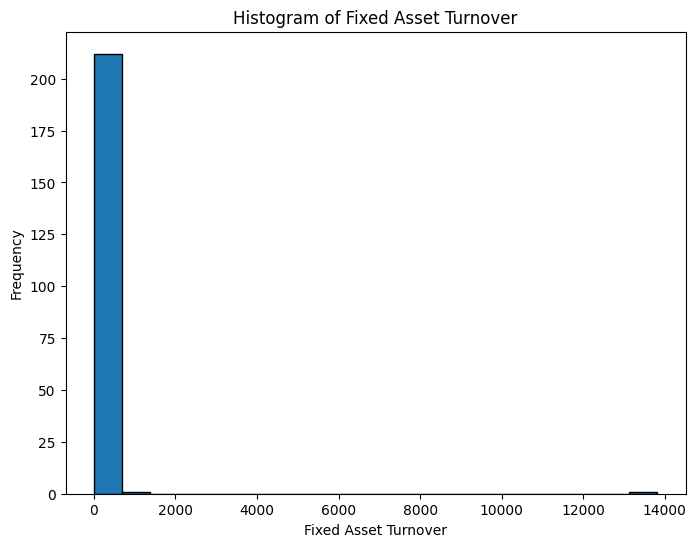

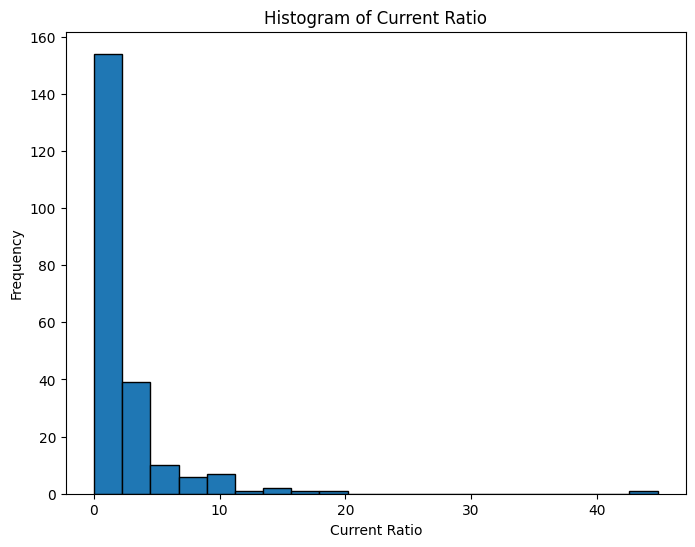

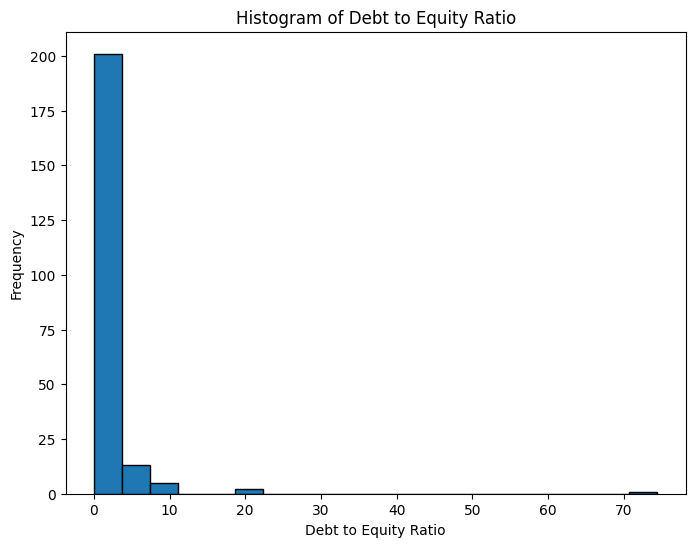

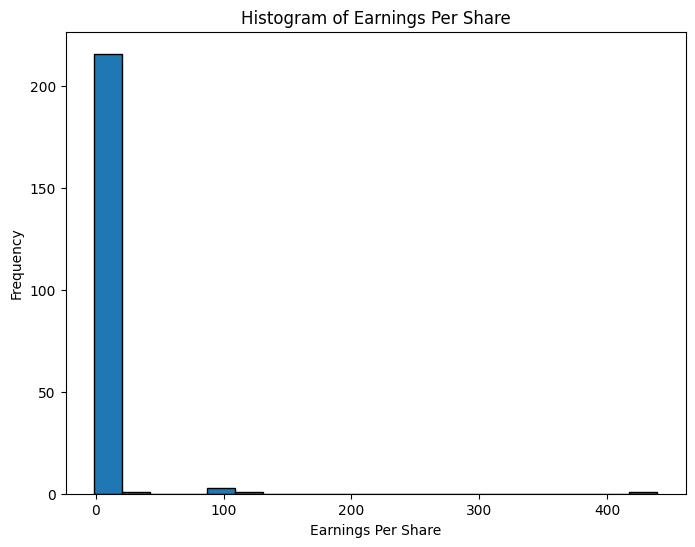

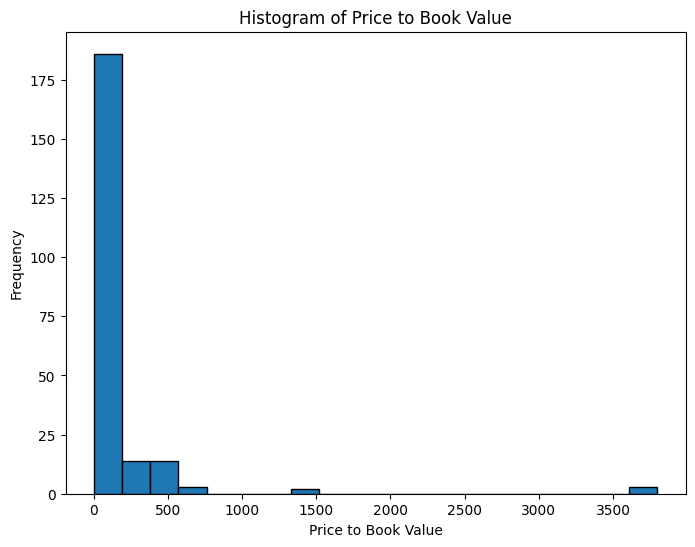

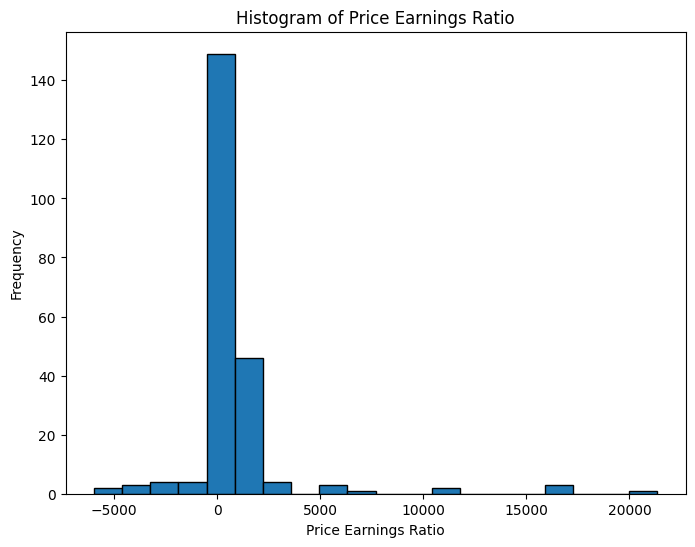

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'financial_ratios_data'
df = financial_ratios_data

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Metrics to plot
metrics = [
    'Net Profit Margin', 'Return on Assets', 'Return on Equity',
    'Total Asset Turnover', 'Fixed Asset Turnover', 'Current Ratio',
    'Debt to Equity Ratio', 'Earnings Per Share', 'Price to Book Value', 'Price Earnings Ratio'
]

# Create histograms for each metric
for metric in metrics:
    if metric in numerical_df.columns:  # Check if the metric is in the numerical DataFrame
        # Replace infinite values with NaN
        data_to_plot = numerical_df[metric].replace([np.inf, -np.inf], np.nan)

        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.hist(data_to_plot.dropna(), bins=20, edgecolor='black')  # Plot histogram without NaN values
        plt.title(f"Histogram of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Metric '{metric}' not found in numerical columns.")

In [ ]:
# Determine the distribution of records in pre- and post-M&A periods
period_distribution = data['year'].value_counts().sort_index()

# Display the distribution
period_distribution

year
-3    31
-2    32
-1    32
 0    32
 1    32
 2    32
 3    32
Name: count, dtype: int64

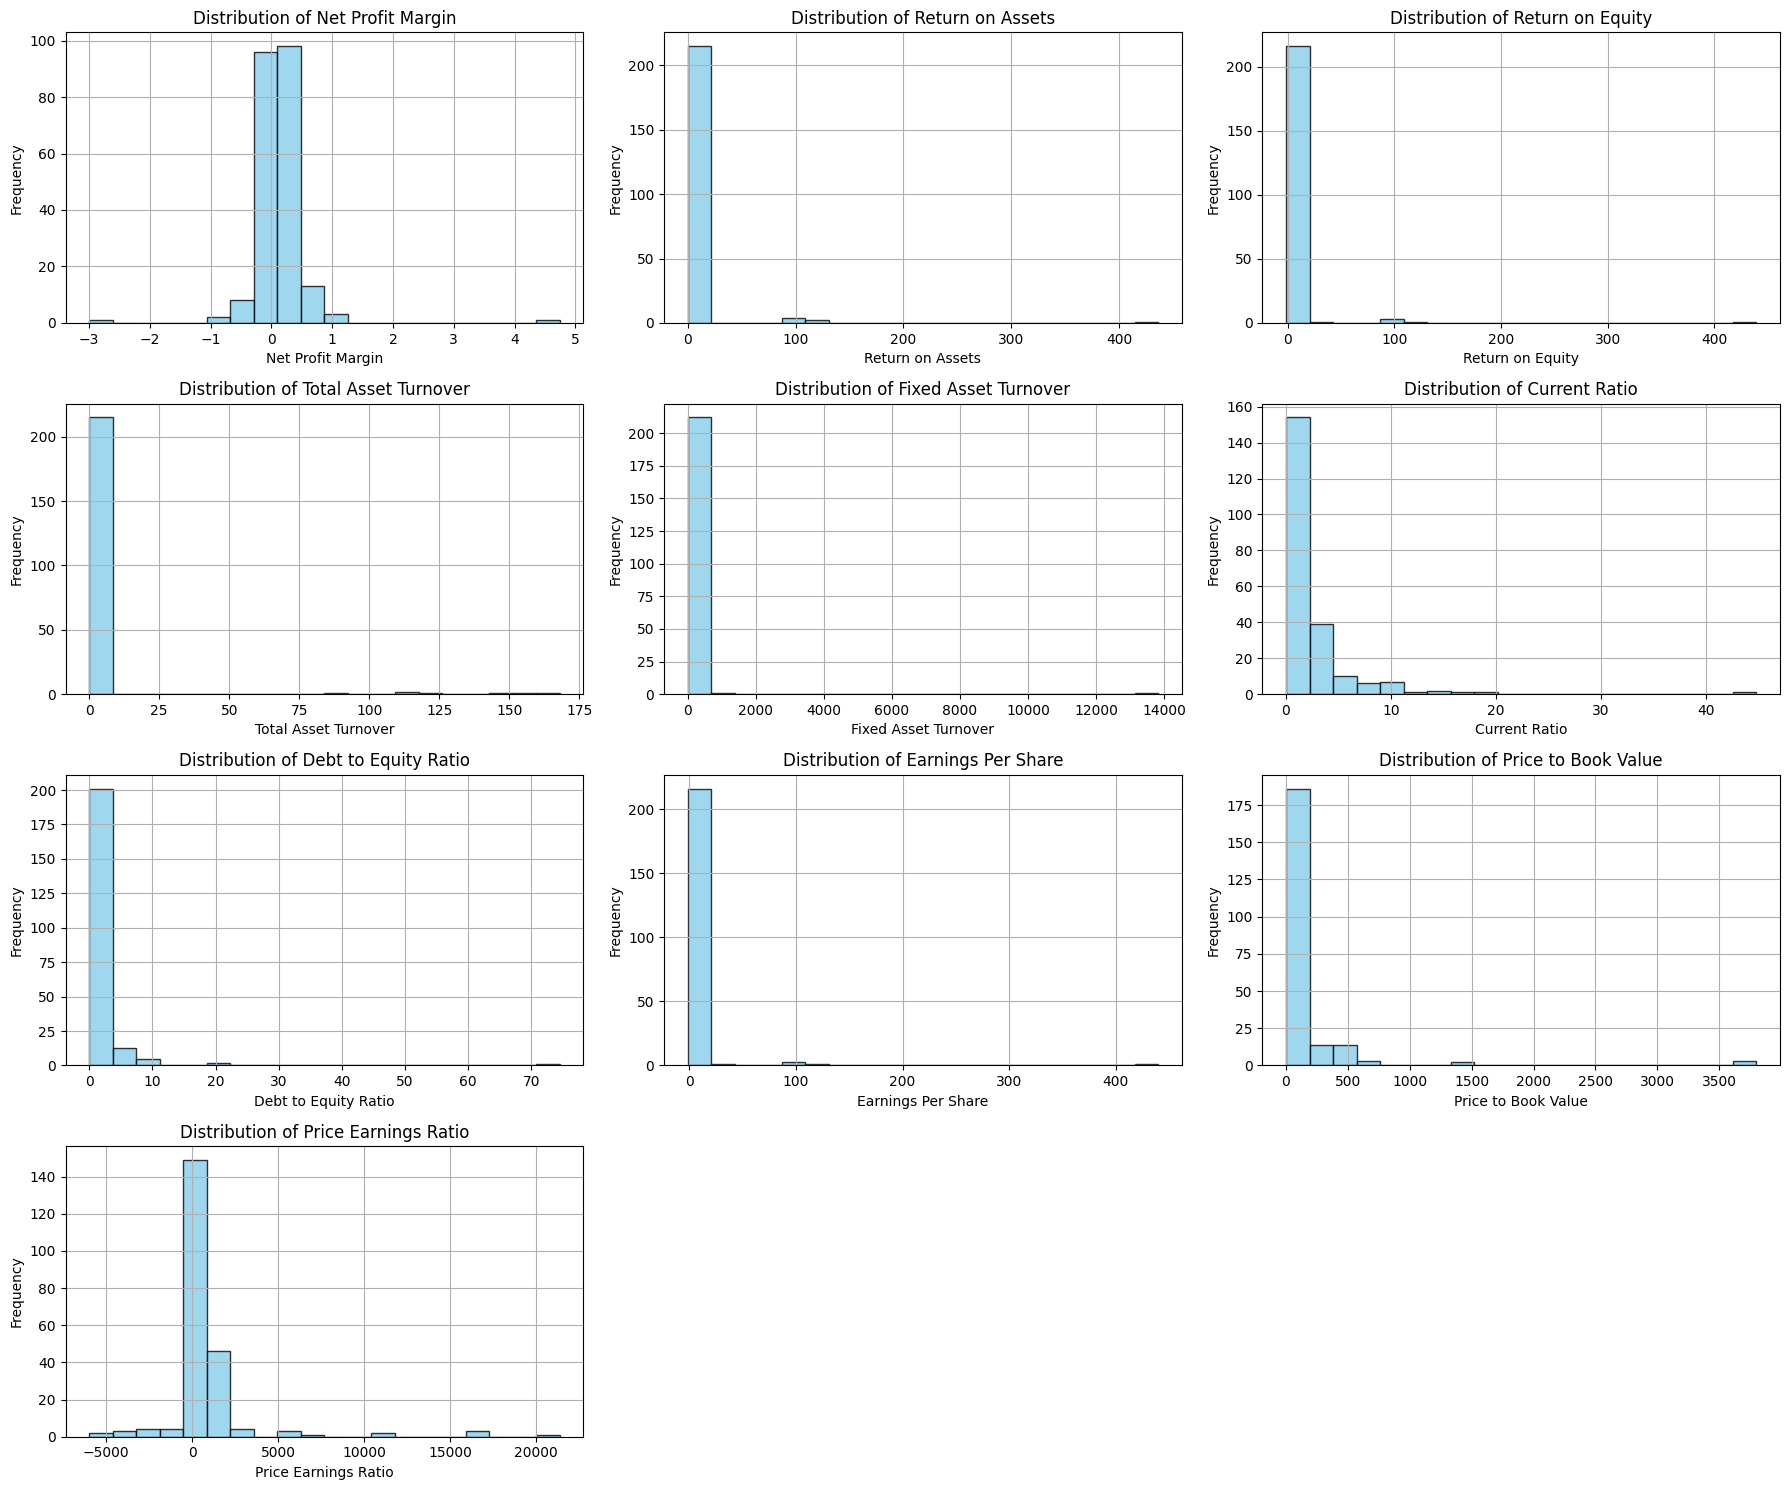

In [ ]:
import numpy as np

# Replace infinite values with NaN in the dataset
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot histograms for the selected metrics after preprocessing
plt.figure(figsize=(18, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(4, 3, i)
    df[metric].dropna().hist(bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(f'Distribution of {metric}', fontsize=12)
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


normalize data

In [ ]:
from scipy.stats import zscore

# Normalize the data for selected metrics
normalized_data = data.copy()

# Apply z-score normalization for the selected metrics
for metric in metrics:
    if metric in normalized_data.columns:
        normalized_data[metric] = zscore(normalized_data[metric].dropna())
    else:
        print(f"Metric '{metric}' not found in the dataset.")

# Verify normalization by checking the mean and standard deviation of the metrics
normalized_summary = normalized_data[metrics].describe()

# Display the summary statistics of the normalized data
#import ace_tools as tools; tools.display_dataframe_to_user(name="Normalized Metrics Summary", dataframe=normalized_summary)


perform t test

In [ ]:
from scipy.stats import ttest_ind


data=normalized_data
# Define categories for analysis
categories = {
    "Profitability": ['Net Profit Margin', 'Return on Assets', 'Return on Equity'],
    "Efficiency": ['Total Asset Turnover', 'Fixed Asset Turnover'],
    "Liquidity": ['Current Ratio'],
    "Financial Structure": ['Debt to Equity Ratio'],
    "Investment Ratios": ['Earnings Per Share', 'Price to Book Value', 'Price Earnings Ratio']
}

# Define a function to perform t-tests and summarize results
def perform_t_tests(data, categories, group_column='year', group_split=0):
    results = {}
    for category, metrics in categories.items():
        results[category] = {}
        for metric in metrics:
            # Split data into pre- and post-M&A groups
            pre_mna = data[data[group_column] <= group_split][metric].dropna()
            post_mna = data[data[group_column] > group_split][metric].dropna()

            # Perform t-test
            t_stat, p_value = ttest_ind(pre_mna, post_mna, equal_var=False)

            # Store results
            results[category][metric] = {"T-statistic": t_stat, "P-value": p_value}
    return results

# Perform the t-tests
t_test_results = perform_t_tests(normalized_data, categories)
t_test_results


{'Profitability': {'Net Profit Margin': {'T-statistic': -0.8225192839645868,
   'P-value': 0.4120509148593213},
  'Return on Assets': {'T-statistic': -0.738785333881851,
   'P-value': 0.46154659751015537},
  'Return on Equity': {'T-statistic': -0.6647945456092021,
   'P-value': 0.5075463177189884}},
 'Efficiency': {'Total Asset Turnover': {'T-statistic': 0.13307055045550306,
   'P-value': 0.8942664284210613},
  'Fixed Asset Turnover': {'T-statistic': 1.0385127219681134,
   'P-value': 0.30109815179590665}},
 'Liquidity': {'Current Ratio': {'T-statistic': -0.31518660039281765,
   'P-value': 0.7529190183662141}},
 'Financial Structure': {'Debt to Equity Ratio': {'T-statistic': 2.164141905023025,
   'P-value': 0.03222236151068267}},
 'Investment Ratios': {'Earnings Per Share': {'T-statistic': -0.6647945456092021,
   'P-value': 0.5075463177189884},
  'Price to Book Value': {'T-statistic': 1.7954940459929394,
   'P-value': 0.07473075764521106},
  'Price Earnings Ratio': {'T-statistic': 1.937

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load datasets
df = financial_ratios_data
#df_imputed = pd.read_csv('/content/financial_ratios_imputed.csv')

# Define a function to analyze the impact based on relative year
def analyze_impact_relative_year(df, year_col, metrics):
    # Create a flag for pre- and post-M&A periods
    df['Pre_Post'] = np.where(df[year_col] < 0, 'Pre-M&A', 'Post-M&A')

    # Aggregate metrics by pre- and post-M&A periods
    results = {}
    for metric in metrics:
        pre_data = df[df['Pre_Post'] == 'Pre-M&A'][metric]
        post_data = df[df['Pre_Post'] == 'Post-M&A'][metric]

        # Calculate mean, standard deviation, and perform t-test
        results[metric] = {
            'Pre-M&A Mean': np.mean(pre_data),
            'Post-M&A Mean': np.mean(post_data),
            'Pre-M&A Std': np.std(pre_data),
            'Post-M&A Std': np.std(post_data),
            'T-test P-value': ttest_ind(pre_data, post_data, nan_policy='omit').pvalue
        }

    return pd.DataFrame(results).T

# Metrics to analyze
metrics = [
    'Net Profit Margin', 'Return on Assets', 'Return on Equity',
    'Total Asset Turnover', 'Fixed Asset Turnover', 'Current Ratio',
    'Debt to Equity Ratio', 'Earnings Per Share', 'Price to Book Value', 'Price Earnings Ratio'
]

# Analyze impact for both datasets
results_cleaned = analyze_impact_relative_year(df_cleaned, 'year', metrics)
#results_imputed = analyze_impact_relative_year(df_imputed, 'year', metrics)

# Save results for comparison
#results_cleaned.to_csv('/content/impact_analysis_cleaned_relative_year.csv')
#results_imputed.to_csv('/content/impact_analysis_imputed_relative_year.csv')

# print values
#print("Impact analysis completed:")
#print("- Cleaned dataset results: impact_analysis_cleaned_relative_year.csv")
#print("- Imputed dataset results: impact_analysis_imputed_relative_year.csv")
###



# Analyze impact for both datasets
#results_cleaned = analyze_impact(df_cleaned, 'Start Date', 'Financial Year', metrics, start_date=2020)  # Replace 2020 with your actual M&A start year
#results_imputed = analyze_impact(df_imputed, 'Start Date', 'Financial Year', metrics, start_date=2020)

# Display results for comparison
print("Impact Analysis for Cleaned Dataset:")
results_cleaned



Impact Analysis for Cleaned Dataset:


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2


Pre-M&A Mean  Post-M&A Mean  Pre-M&A Std  Post-M&A Std  \
Net Profit Margin         0.123739       0.139720     0.243019      0.556163   
Return on Assets          3.426139       6.061509    18.792501     41.777026   
Return on Equity          3.507181       4.793108    18.959598     39.933638   
Total Asset Turnover      4.782279       4.745752    22.287235     23.494198   
Fixed Asset Turnover           inf            inf          NaN           NaN   
Current Ratio             2.507314       2.683807     4.910526      3.324214   
Debt to Equity Ratio      2.671201       1.173365     8.091877      1.574036   
Earnings Per Share        3.507181       4.793108    18.959598     39.933638   
Price to Book Value     223.287368     146.412992   656.782089    206.575355   
Price Earnings Ratio   1247.906134     717.511643  3655.127389   1818.441539   

                      T-test P-value  
Net Profit Margin           0.794493  
Return on Assets            0.568975  
Return on Equity            0.772833  
Total Asset Turnover        0.990706  
Fixed Asset Turnover             NaN  
Current Ratio               0.751151  
Debt to Equity Ratio        0.043973  
Earnings Per Share          0.772833  
Price to Book Value         0.218508  
Price Earnings Ratio        0.159622